# CS 4644: Final Project Visualizations

Copyright (c) 2025 Ethan Nguyen-Tu

## Part 1: Setup

##### STEP 1: Mount Google Drive and Set Device for Google Colab

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
project_folder = "drive/MyDrive/CS4644_FinalProject"

##### STEP 2: All Imports

In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from PIL import Image
import zipfile

##### STEP 3: General Helper Functions

In [4]:
def load_history(csv):
  return pd.read_csv(''.join([project_folder, "/History", csv]))

In [5]:
def loss_valid_comp(model_name, training_loss, training_accuracy, validation_loss, validation_accuracy, xshift=1, yshift=0.55):
  fig, axs = plt.subplots(1, 2, figsize=(12, 5))

  axs[0].set_xlabel('Epoch')
  axs[0].set_ylabel('Loss', color='tab:red')
  tl, = axs[0].plot(training_loss, label='Loss', color='tab:red')
  axs[0].set_title(' '.join([model_name, 'Training Curves']))

  ax0Twin = axs[0].twinx()
  ax0Twin.set_ylabel('Accuracy', color='tab:blue')
  tv, = ax0Twin.plot(training_accuracy, label='Accuracy')

  axs[0].legend([tl, tv], [tl.get_label(), tv.get_label()], bbox_to_anchor=(xshift, yshift))


  axs[1].set_xlabel('Epoch')
  axs[1].set_ylabel('Loss', color='tab:red')
  vl, = axs[1].plot(validation_loss, label='Loss', color='tab:red')
  axs[1].set_title(' '.join([model_name, 'Validation Curves']))

  ax1Twin = axs[1].twinx()
  ax1Twin.set_ylabel('Accuracy', color='tab:blue')
  vv, = ax1Twin.plot(validation_accuracy, label='Accuracy')

  axs[1].legend([vl, vv], [vl.get_label(), vv.get_label()], bbox_to_anchor=(xshift, yshift))

  plt.tight_layout()
  plt.show()

In [6]:
def model_results(model_name, training_loss, training_accuracy, validation_loss, validation_accuracy):
  plt.figure(figsize=(12, 5))

  plt.subplot(1, 2, 1)
  plt.plot(training_loss, label='Training Loss')
  plt.plot(validation_loss, label='Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.title(' '.join([model_name, 'Loss Curves']))

  plt.subplot(1, 2, 2)
  plt.plot(training_accuracy, label='Training Accuracy')
  plt.plot(validation_accuracy, label='Validation Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.title(' '.join([model_name, 'Accuracy Curves']))

  plt.tight_layout()
  plt.show()

In [7]:
def model_plots(model_name, model_history, xshift=1, yshift=0.55):
  loss_valid_comp(model_name, model_history["loss"], model_history["accuracy"], model_history["val_loss"], model_history["val_accuracy"], xshift, yshift)
  model_results(model_name, model_history["loss"], model_history["accuracy"], model_history["val_loss"], model_history["val_accuracy"])

In [8]:
def model_comparison(model1_name, model1_loss, model1_accuracy, model2_name, model2_loss, model2_accuracy, prefix="Training"):

  loss_diff = abs(model1_loss - model2_loss)
  val_diff = abs(model1_accuracy - model2_accuracy)
  print("Loss Difference:\n", loss_diff)
  print("Max Loss Difference:", max(loss_diff))
  print("Accuracy Difference:\n", val_diff)
  print("Max Accuracy Difference:", max(val_diff))

  plt.figure(figsize=(12, 5))

  plt.subplot(1, 2, 1)
  plt.plot(model1_loss, label=' '.join([model1_name, prefix, 'Loss']))
  plt.plot(model2_loss, label=' '.join([model2_name, prefix, 'Loss']))
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.title(' '.join([model1_name, 'vs.', model2_name, 'Loss Curves']))

  plt.subplot(1, 2, 2)
  plt.plot(model1_accuracy, label=' '.join([model1_name, prefix, 'Accuracy']))
  plt.plot(model2_accuracy, label=' '.join([model2_name, prefix, 'Accuracy']))
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.title(' '.join([model1_name, 'vs.', model2_name, 'Accuracy Curves']))

  plt.tight_layout()
  plt.show()

In [9]:
def full_model_comparison(model1_name, model1_history, model2_name, model2_history):
  model_comparison(model1_name, model1_history["loss"], model1_history["accuracy"], model2_name, model2_history["loss"], model2_history["accuracy"])
  model_comparison(model1_name, model1_history["val_loss"], model1_history["val_accuracy"], model2_name, model2_history["val_loss"], model2_history["val_accuracy"], prefix="Validation")

In [10]:
def zip_to_colab(zip_file_path, extract_dir_name):
  extract_dir = '/content/' + extract_dir_name + "/"
  os.makedirs(extract_dir, exist_ok=True)
  before_file_count = len(os.listdir(extract_dir))

  with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
      zip_ref.extractall(extract_dir)

  files_extracted = len(os.listdir(extract_dir)) - before_file_count
  print(f"Files from {zip_file_path} extracted to: {extract_dir}")
  print("Number of files extracted:", files_extracted)
  return files_extracted

In [17]:
def get_paths(dataset, path, extension='.jpg'):
  paths = []

  for _, row in dataset.head(3).iterrows():
        paths.append(''.join([path, row["images_id"], extension]))

  return [Image.open(image_path).resize((256,256)) for image_path in paths]

## Part 2: Dataset Visualizations

1. Train and Validation Set Images

In [ ]:
file_count = zip_to_colab(project_folder + '/RealImages.zip', 'FakeVsRealFacesImages')
file_count += zip_to_colab(project_folder + '/FakeImages.zip', 'FakeVsRealFacesImages')
assert len(os.listdir('/content/FakeVsRealFacesImages/')) == file_count # Check to make sure no files were overridden
FAKEVREAL_IMAGE_EXTENSIONS = {'.jpg'}
FAKEVREAL_IMAGE_PATH = '/content/FakeVsRealFacesImages/'

Files from drive/MyDrive/CS4644_FinalProject/RealImages.zip extracted to: /content/FakeVsRealFacesImages/
Number of files extracted: 589
Files from drive/MyDrive/CS4644_FinalProject/FakeImages.zip extracted to: /content/FakeVsRealFacesImages/
Number of files extracted: 700


In [ ]:
df_RealVFake = pd.read_csv(project_folder + "/RealVFakeLabels.csv")
df_real = df_RealVFake[df_RealVFake['label'] == 'real']
df_fake = df_RealVFake[df_RealVFake['label'] == 'fake']

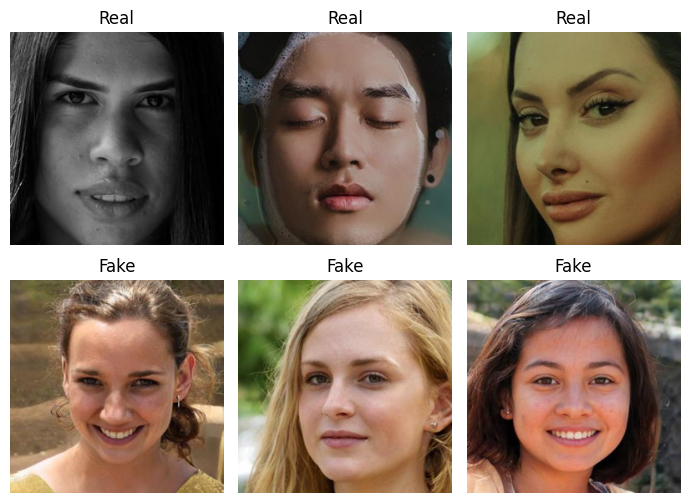

In [ ]:
df_real_images = get_paths(df_real, FAKEVREAL_IMAGE_PATH)
df_fake_images = get_paths(df_fake, FAKEVREAL_IMAGE_PATH)

fig, axes = plt.subplots(2, 3, figsize=(7, 7))

axes = axes.flatten()

length = len(df_real_images)
for i, ax in enumerate(axes):
    if i < length:
        ax.set_title('Real')
        ax.imshow(df_real_images[i])
    else:
        ax.set_title('Fake')
        ax.imshow(df_fake_images[i - length])
    ax.axis('off')

plt.subplots_adjust(hspace=-0.55)
plt.tight_layout()
plt.show()

2. Test Set Images

In [12]:
file_count = zip_to_colab(project_folder + '/Test_RealImages.zip', 'TestDataset')
file_count += zip_to_colab(project_folder + '/Test_FakeImages.zip', 'TestDataset')
assert len(os.listdir('/content/TestDataset/')) == file_count # Check to make sure no files were overridden
TEST_IMAGE_EXTENSIONS = {'.jpg'}
TEST_IMAGE_PATH = '/content/TestDataset/'

Files from drive/MyDrive/CS4644_FinalProject/Test_RealImages.zip extracted to: /content/TestDataset/
Number of files extracted: 129
Files from drive/MyDrive/CS4644_FinalProject/Test_FakeImages.zip extracted to: /content/TestDataset/
Number of files extracted: 129


In [15]:
df_testData = pd.read_csv(project_folder + "/test_data.csv")
df_real = df_testData[df_testData['label'] == 1]
df_fake = df_testData[df_testData['label'] == 0]

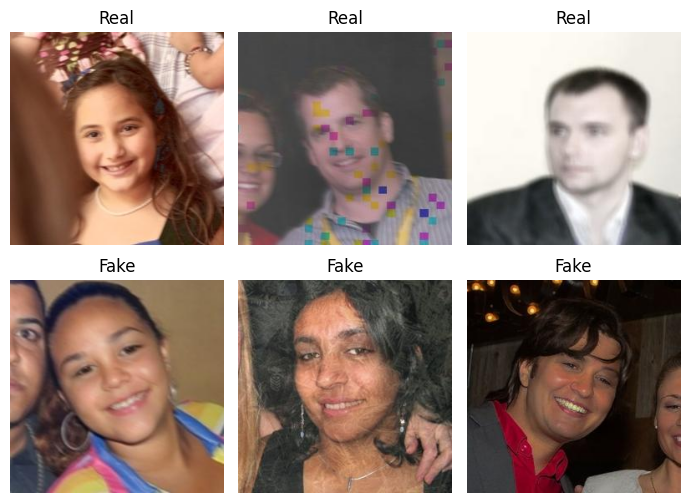

In [18]:
df_real_images = get_paths(df_real, TEST_IMAGE_PATH, extension="")
df_fake_images = get_paths(df_fake, TEST_IMAGE_PATH, extension="")

fig, axes = plt.subplots(2, 3, figsize=(7, 7))

axes = axes.flatten()

length = len(df_real_images)
for i, ax in enumerate(axes):
    if i < length:
        ax.set_title('Real')
        ax.imshow(df_real_images[i])
    else:
        ax.set_title('Fake')
        ax.imshow(df_fake_images[i - length])
    ax.axis('off')

plt.subplots_adjust(hspace=-0.55)
plt.tight_layout()
plt.show()

## PART 3: Model Visualizations

##### Keras Reference Model

In [ ]:
model_reference_history = load_history('/model_reference_history.csv')
model_reference_history

Unnamed: 0  accuracy      loss  val_accuracy  val_loss
0           0  0.593598  0.660705      0.724806  0.604095
1           1  0.812803  0.515495      0.895349  0.341920
2           2  0.949564  0.198628      0.972868  0.075504
3           3  0.978661  0.056446      0.988372  0.023860
4           4  0.991271  0.025314      0.996124  0.015338
5           5  0.999030  0.007643      0.988372  0.021239
6           6  1.000000  0.005165      0.992248  0.018742
7           7  1.000000  0.003601      0.996124  0.014542
8           8  1.000000  0.002036      0.996124  0.012867
9           9  1.000000  0.001140      0.996124  0.017865

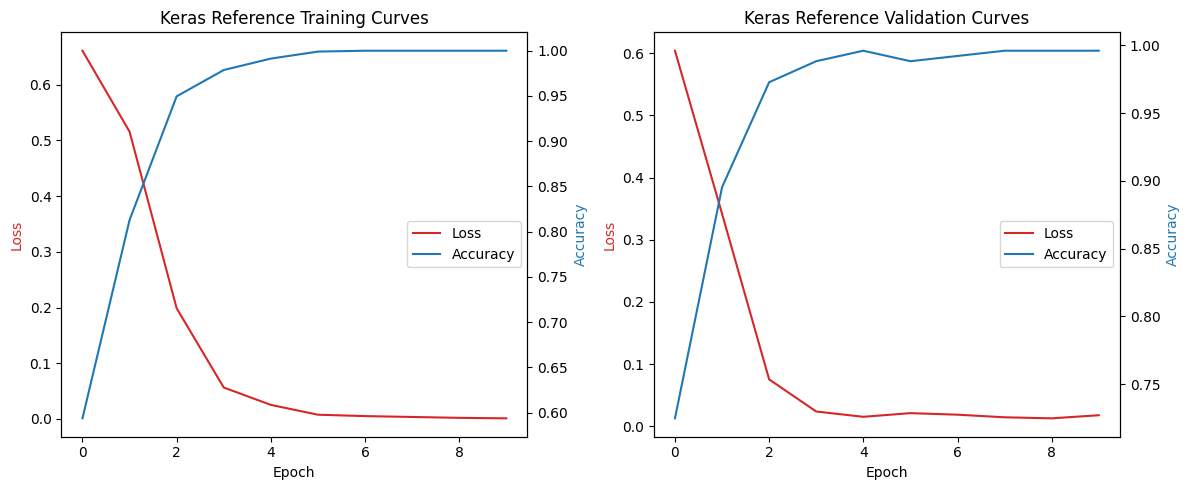

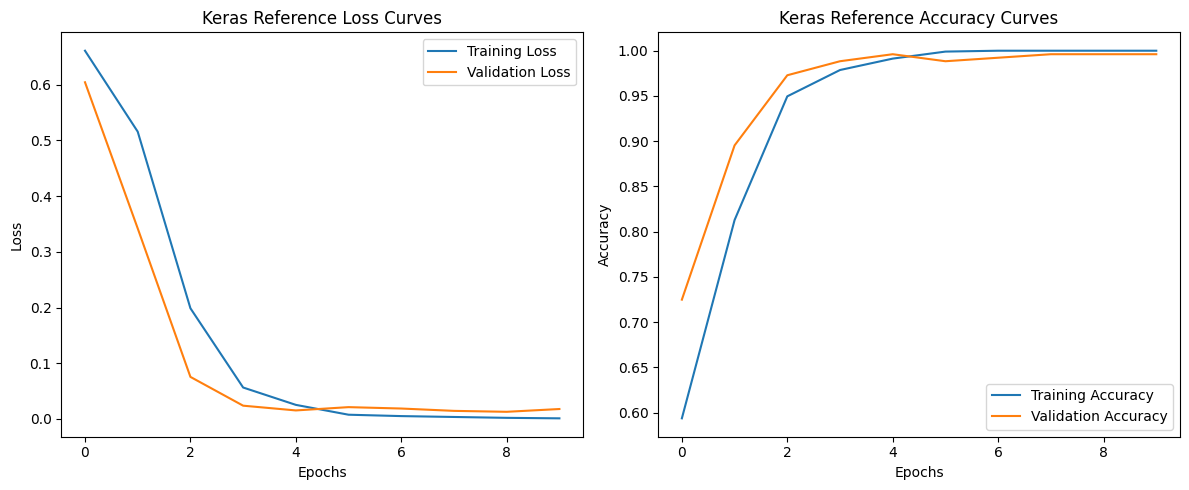

In [ ]:
model_plots("Keras Reference", model_reference_history)

##### PyTorch Conversion Model

In [ ]:
pytorch_conversion_history = load_history('/pytorch_conversion_history.csv')
pytorch_conversion_history

Unnamed: 0  accuracy      loss  val_accuracy  val_loss
0           0  0.540252  0.689503      0.538760  0.699417
1           1  0.544132  0.676888      0.624031  0.667686
2           2  0.780795  0.507133      0.875969  0.293042
3           3  0.896217  0.234463      0.953488  0.099015
4           4  0.955383  0.125338      0.968992  0.070615
5           5  0.967992  0.088435      0.988372  0.040238
6           6  0.983511  0.053033      0.984496  0.035191
7           7  0.985451  0.036019      0.996124  0.030963
8           8  0.994180  0.024632      0.996124  0.032331
9           9  0.995150  0.015329      0.984496  0.034484

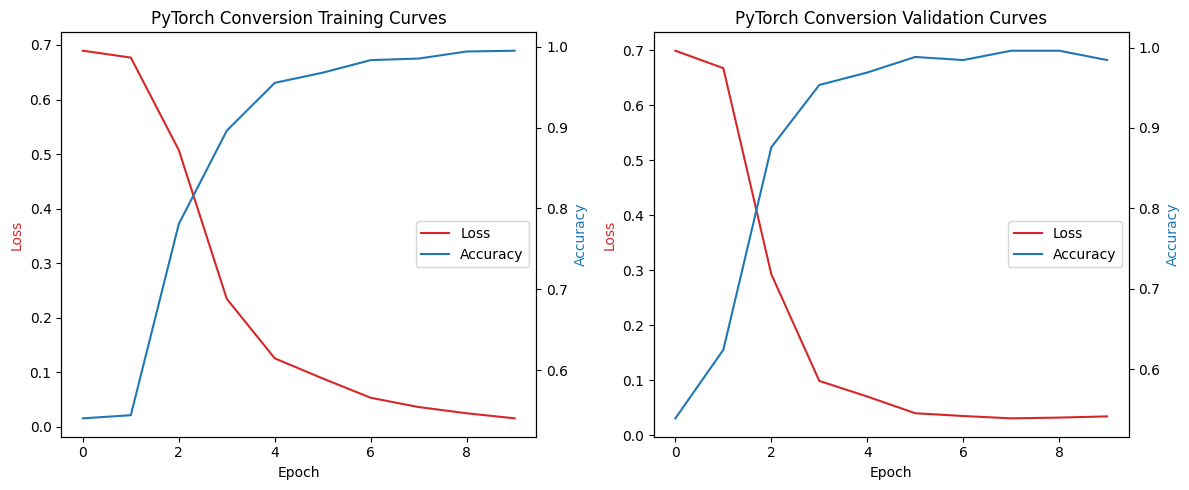

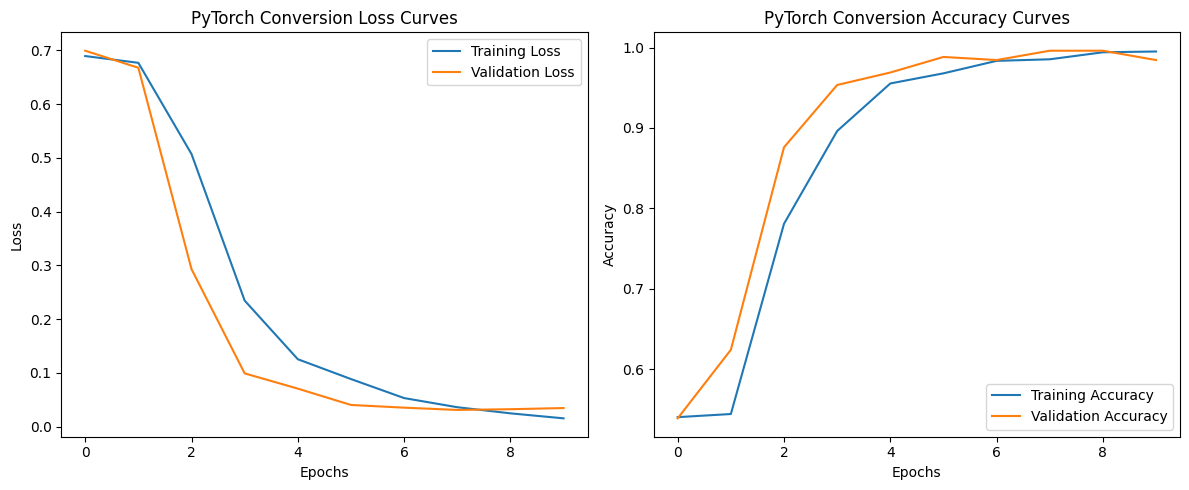

In [ ]:
model_plots("PyTorch Conversion", pytorch_conversion_history)

##### Keras 10x Learning Rate Model

In [ ]:
keras_10x_LR_history = load_history('/keras_10x_LR_history.csv')
keras_10x_LR_history

Unnamed: 0  accuracy      loss  val_accuracy  val_loss
0           0  0.514064  0.709398      0.538760  0.684947
1           1  0.620757  0.672691      0.593023  0.581557
2           2  0.914646  0.282312      0.972868  0.085967
3           3  0.987391  0.053579      0.988372  0.075966
4           4  0.993210  0.023344      0.972868  0.095960
5           5  0.995150  0.020928      0.992248  0.054178
6           6  0.991271  0.021332      0.988372  0.051000
7           7  0.998060  0.007621      0.980620  0.042812
8           8  1.000000  0.001794      0.984496  0.059676
9           9  1.000000  0.000280      0.984496  0.088866

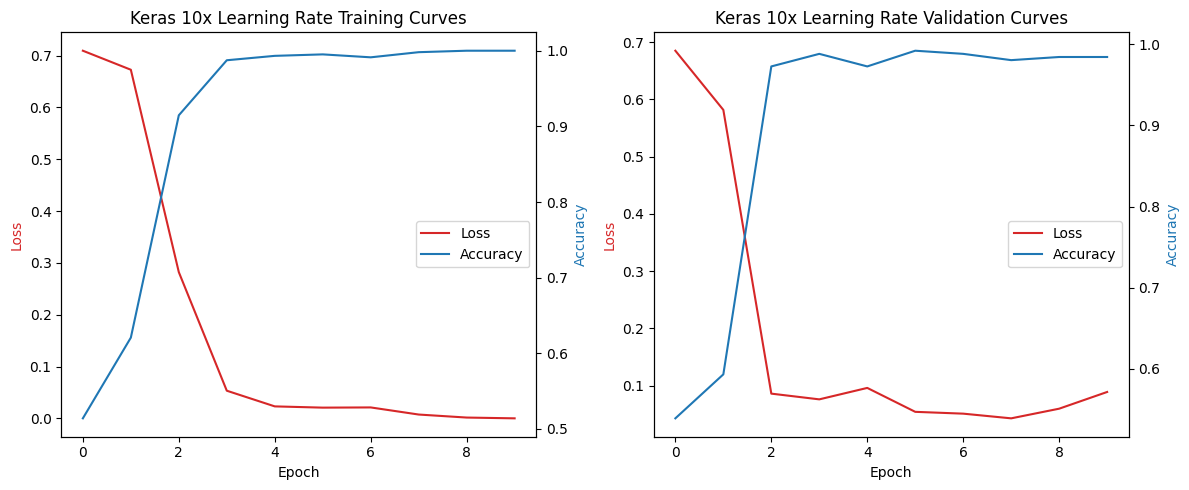

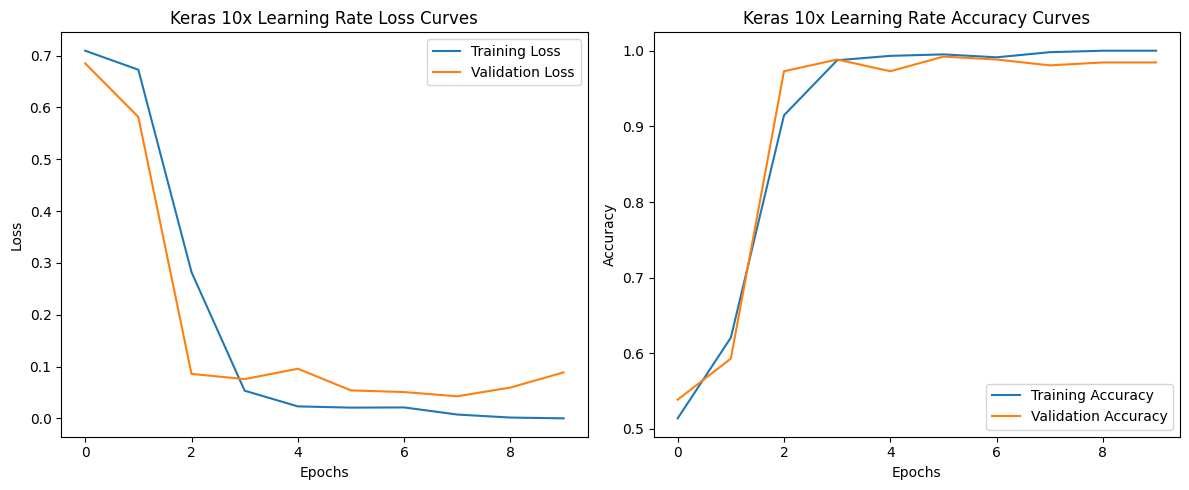

In [ ]:
model_plots("Keras 10x Learning Rate", keras_10x_LR_history)

##### PyTorch 10x Learning Rate Model

In [ ]:
pyTorch_10x_LR_history = load_history('/pytorch_10X_LR_history.csv')
pyTorch_10x_LR_history

Unnamed: 0  accuracy      loss  val_accuracy  val_loss
0           0  0.528613  0.696424      0.538760  0.702956
1           1  0.544132  0.687492      0.538760  0.703638
2           2  0.705141  0.542407      0.868217  0.300824
3           3  0.930165  0.180225      0.926357  0.157938
4           4  0.960233  0.091826      0.976744  0.056932
5           5  0.991271  0.026984      0.988372  0.040748
6           6  0.998060  0.006330      0.992248  0.046156
7           7  0.999030  0.002072      0.976744  0.047103
8           8  0.995150  0.015752      0.996124  0.012086
9           9  0.997090  0.010268      0.988372  0.055203

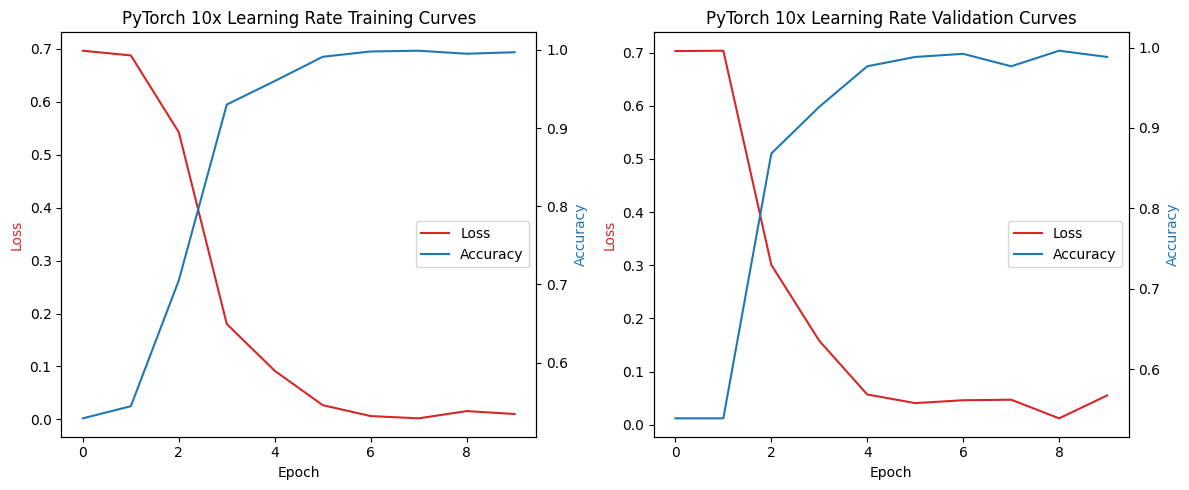

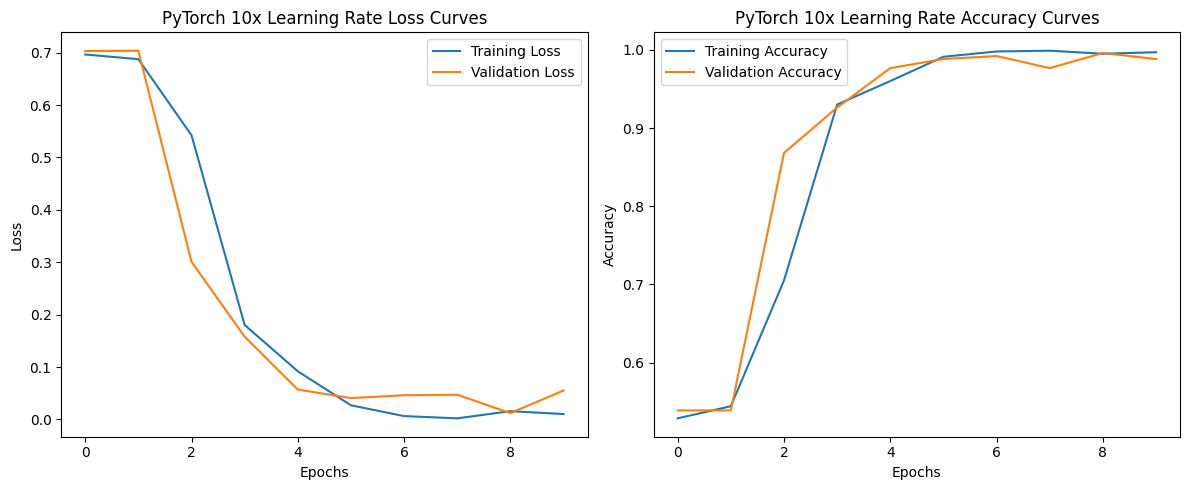

In [ ]:
model_plots("PyTorch 10x Learning Rate", pyTorch_10x_LR_history)

##### Keras 100x Learning Rate Model

In [ ]:
keras_100x_LR_history = load_history('/keras_100x_LR_history.csv')
keras_100x_LR_history

Unnamed: 0  accuracy       loss  val_accuracy  val_loss
0           0  0.486906  15.791861      0.546512  0.690219
1           1  0.515034   5.813708      0.538760  0.690228
2           2  0.521823   0.692306      0.538760  0.697046
3           3  0.523763   0.690967      0.538760  0.693089
4           4  0.584869   0.676565      0.445736  1.265825
5           5  0.534433   0.790690      0.538760  0.691148
6           6  0.518914   0.696424      0.538760  0.690340
7           7  0.544132   0.689583      0.538760  0.691942
8           8  0.544132   0.691003      0.538760  0.690308
9           9  0.544132   0.690289      0.538760  0.690152

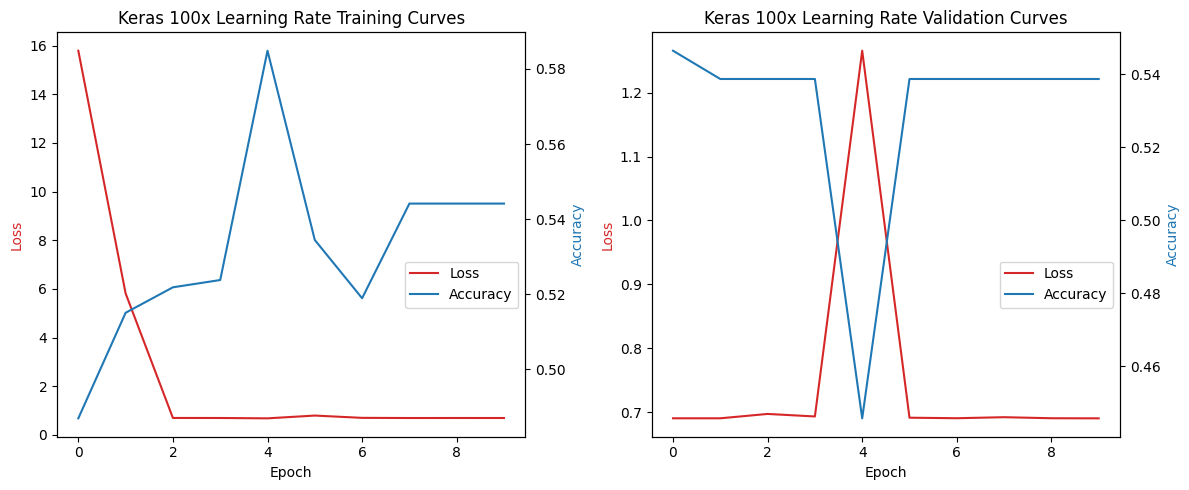

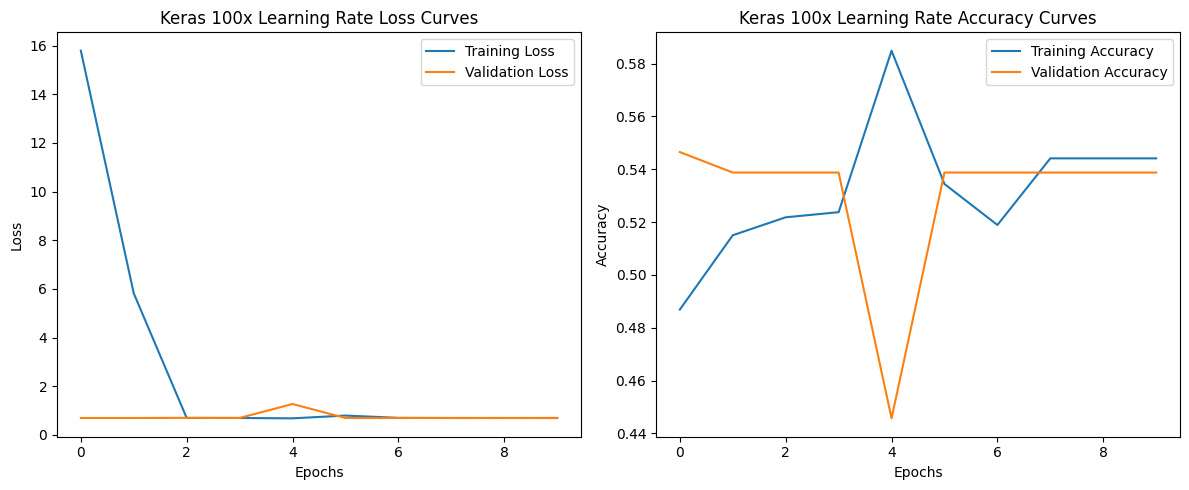

In [ ]:
model_plots("Keras 100x Learning Rate", keras_100x_LR_history, yshift=0.45)

##### PyTorch 100x Learning Rate Model

In [ ]:
pyTorch_100x_LR_history = load_history('/pytorch_100X_LR_history.csv')
pyTorch_100x_LR_history

Unnamed: 0  accuracy       loss  val_accuracy  val_loss
0           0  0.481086  32.218477       0.46124  0.688694
1           1  0.513094   1.473510       0.53876  0.705333
2           2  0.544132   0.751336       0.53876  0.729134
3           3  0.543162   0.691236       0.53876  0.699245
4           4  0.544132   0.689422       0.53876  0.716976
5           5  0.544132   0.692355       0.53876  0.710030
6           6  0.544132   0.690466       0.53876  0.701136
7           7  0.544132   0.689263       0.53876  0.708256
8           8  0.544132   0.689237       0.53876  0.708749
9           9  0.544132   0.687749       0.53876  0.710134

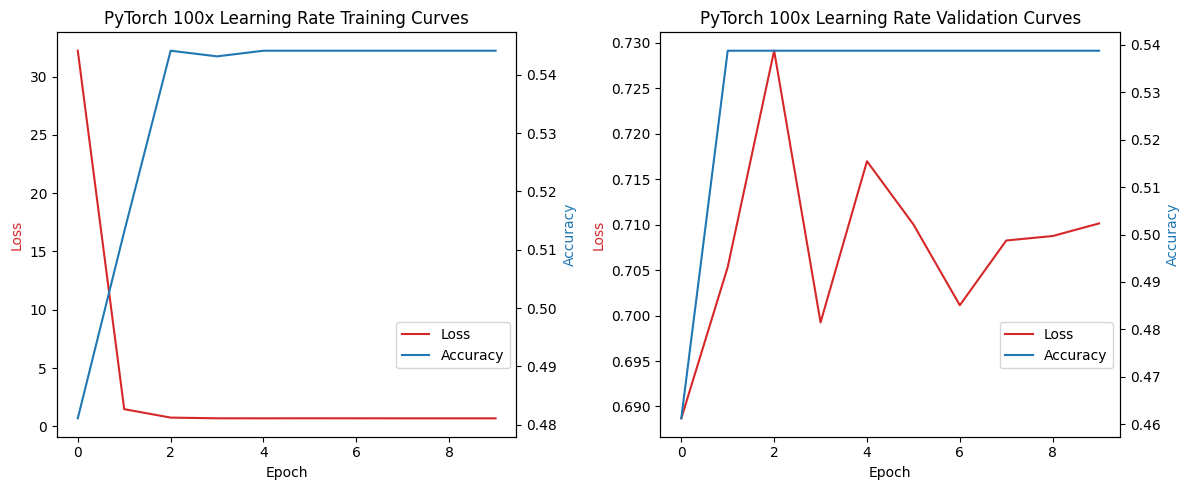

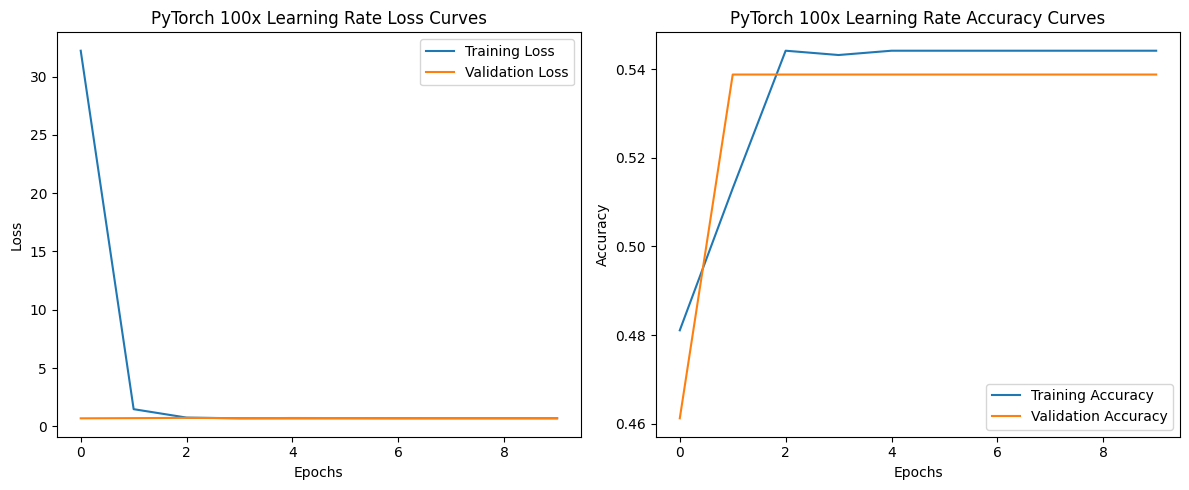

In [ ]:
model_plots("PyTorch 100x Learning Rate", pyTorch_100x_LR_history, yshift=0.3)

##### Keras Additional Layers Model

In [ ]:
keras_additional_conv_history = load_history('/keras_additional_conv_history.csv')
keras_additional_conv_history

Unnamed: 0  accuracy      loss  val_accuracy  val_loss
0           0  0.577110  0.673043      0.674419  0.628868
1           1  0.764306  0.542625      0.895349  0.347364
2           2  0.934045  0.198700      0.968992  0.085744
3           3  0.981571  0.052110      0.968992  0.077166
4           4  0.974782  0.057371      0.984496  0.038137
5           5  0.991271  0.039715      0.996124  0.023253
6           6  0.998060  0.011664      0.992248  0.022533
7           7  1.000000  0.003586      0.996124  0.016724
8           8  1.000000  0.001130      0.992248  0.020944
9           9  1.000000  0.000849      0.996124  0.019203

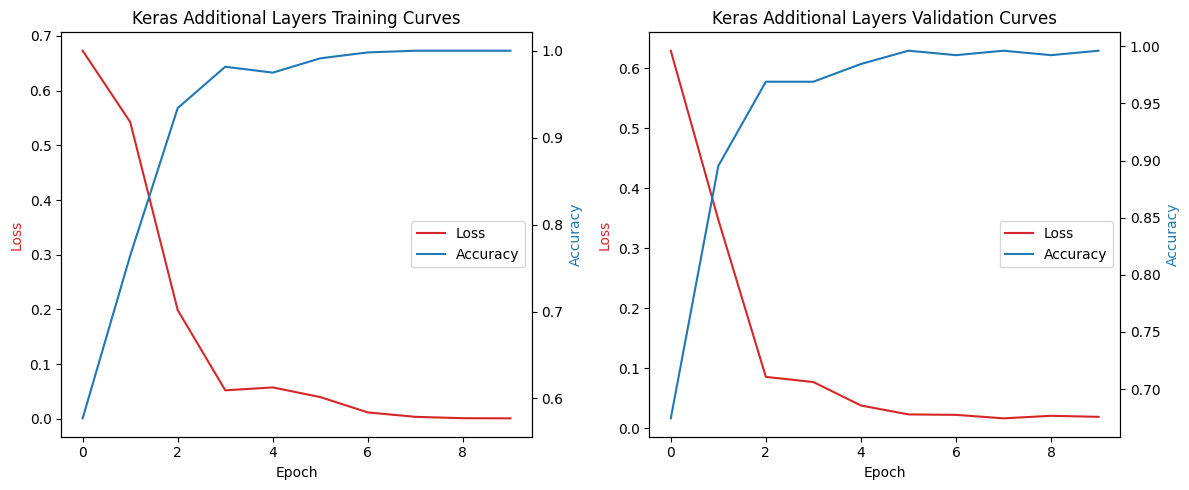

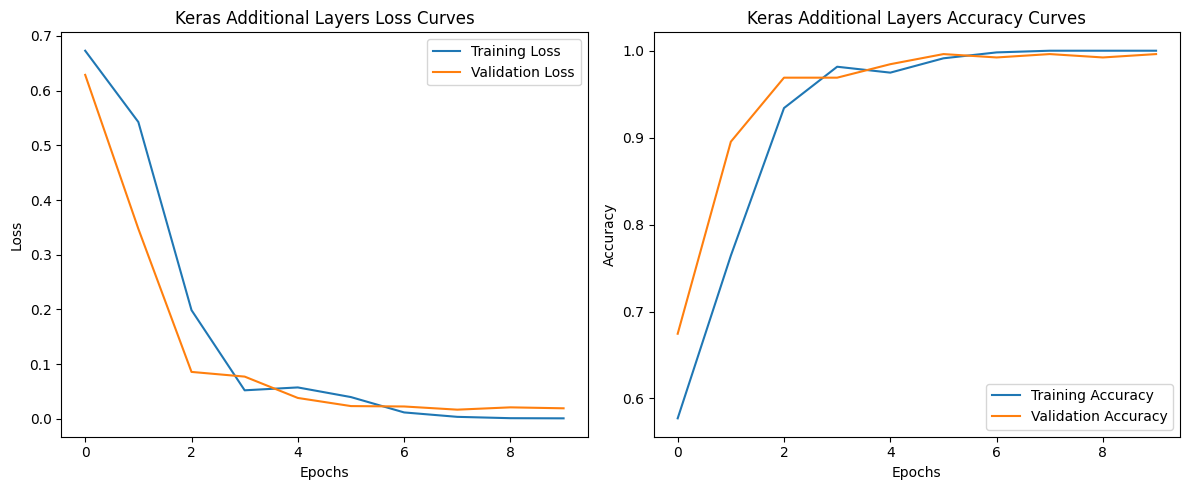

In [ ]:
model_plots("Keras Additional Layers", keras_additional_conv_history)

##### PyTorch Additional Layers Model

In [ ]:
pyTorch_additional_conv_history = load_history('/pytorch_additional_conv_history.csv')
pyTorch_additional_conv_history

Unnamed: 0  accuracy      loss  val_accuracy  val_loss
0           0  0.538312  0.690637      0.538760  0.700919
1           1  0.544132  0.688067      0.538760  0.696891
2           2  0.638215  0.605140      0.821705  0.390768
3           3  0.889428  0.279198      0.972868  0.084396
4           4  0.965082  0.098923      0.992248  0.032311
5           5  0.986421  0.045268      0.996124  0.007440
6           6  0.996120  0.014885      0.996124  0.009769
7           7  1.000000  0.003732      0.996124  0.006544
8           8  1.000000  0.002829      1.000000  0.002805
9           9  1.000000  0.001208      0.996124  0.004945

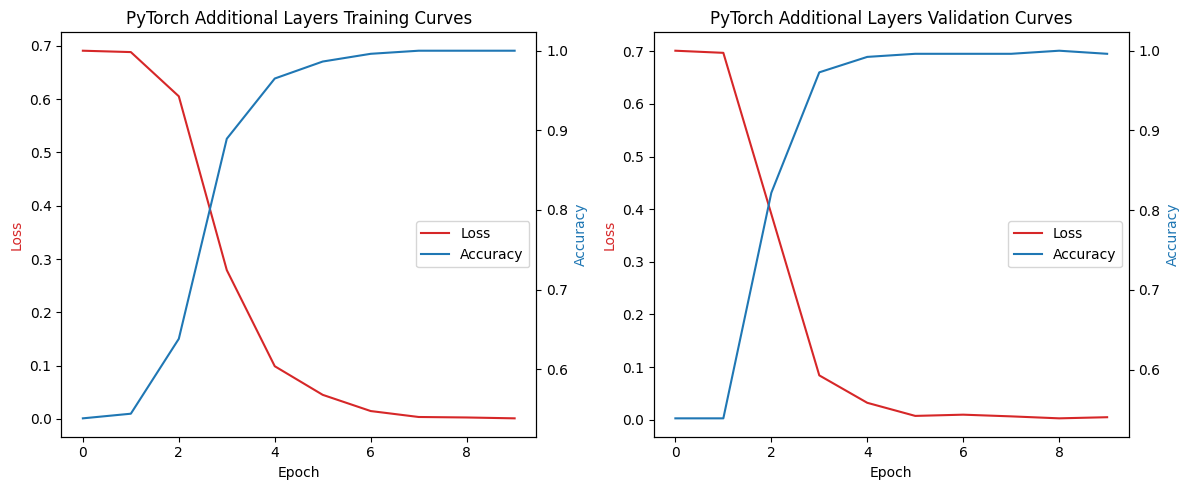

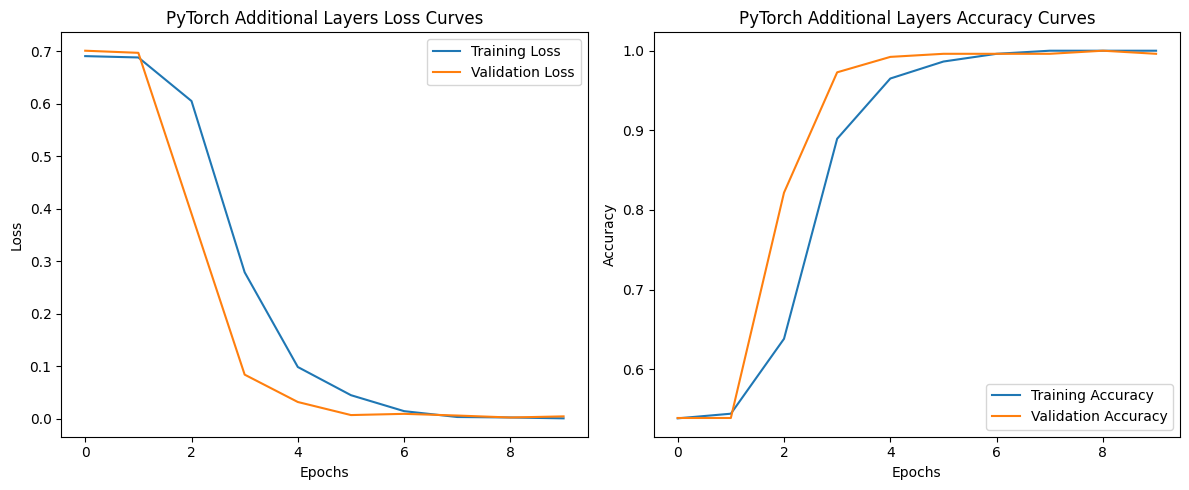

In [ ]:
model_plots("PyTorch Additional Layers", pyTorch_additional_conv_history)

##### Keras Image Transforms Model

In [ ]:
keras_imageTransforms_history = load_history('/keras_imageTransforms_history.csv')
keras_imageTransforms_history

Unnamed: 0  accuracy      loss  val_accuracy  val_loss
0           0  0.553831  0.685507      0.542636  0.680242
1           1  0.582929  0.661975      0.651163  0.632145
2           2  0.709020  0.566907      0.829457  0.494663
3           3  0.858390  0.363024      0.957364  0.195317
4           4  0.949564  0.158713      0.992248  0.057142
5           5  0.977692  0.065689      0.996124  0.024327
6           6  0.986421  0.039658      0.992248  0.019231
7           7  0.994180  0.023597      0.992248  0.033469
8           8  0.985451  0.045004      0.992248  0.018026
9           9  0.991271  0.023751      0.992248  0.021724

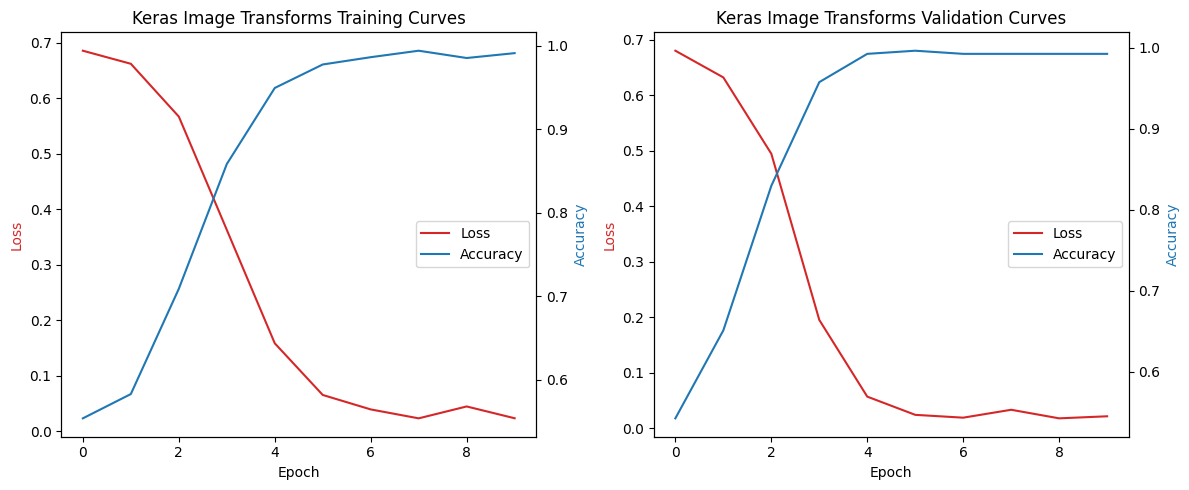

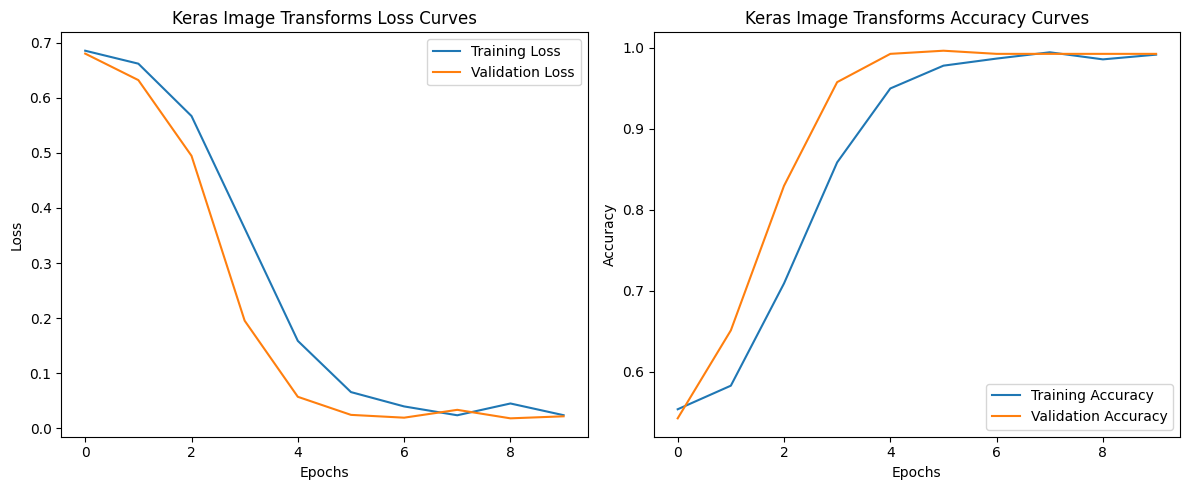

In [ ]:
model_plots("Keras Image Transforms", keras_imageTransforms_history)

##### PyTorch Image Transforms Model

In [ ]:
pyTorch_imageTransforms_history = load_history('/pyTorch_imageTransforms_history.csv')
pyTorch_imageTransforms_history

Unnamed: 0  accuracy      loss  val_accuracy  val_loss
0           0  0.560621  0.682328      0.538760  0.696114
1           1  0.725509  0.523459      0.779070  0.583484
2           2  0.922405  0.188413      0.945736  0.519509
3           3  0.968962  0.084682      0.720930  0.518784
4           4  0.980601  0.045881      0.972868  0.338890
5           5  0.996120  0.018526      0.972868  0.307655
6           6  1.000000  0.008335      0.980620  0.216450
7           7  1.000000  0.004119      0.988372  0.186519
8           8  1.000000  0.001739      0.984496  0.161764
9           9  1.000000  0.000899      0.980620  0.150488

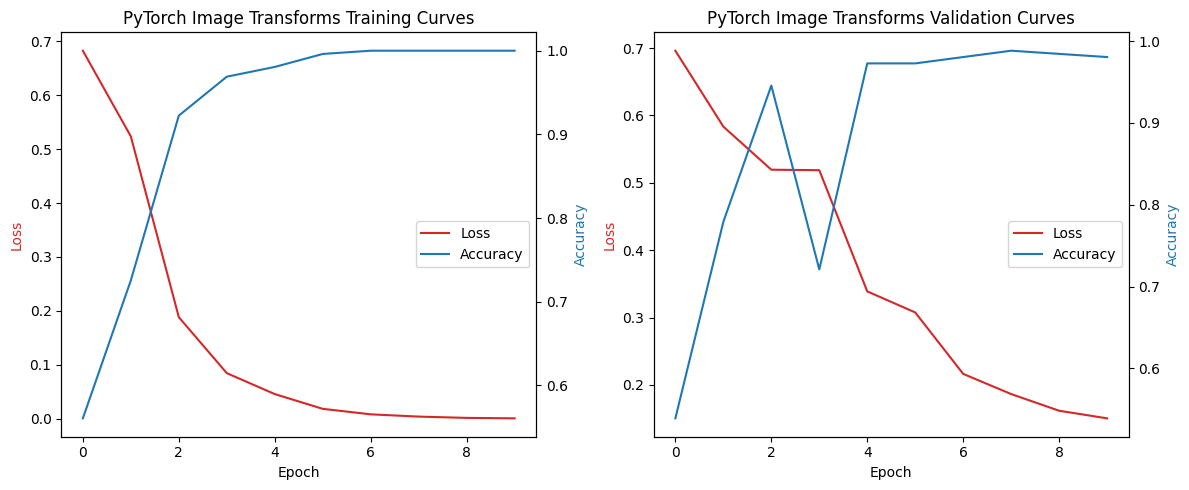

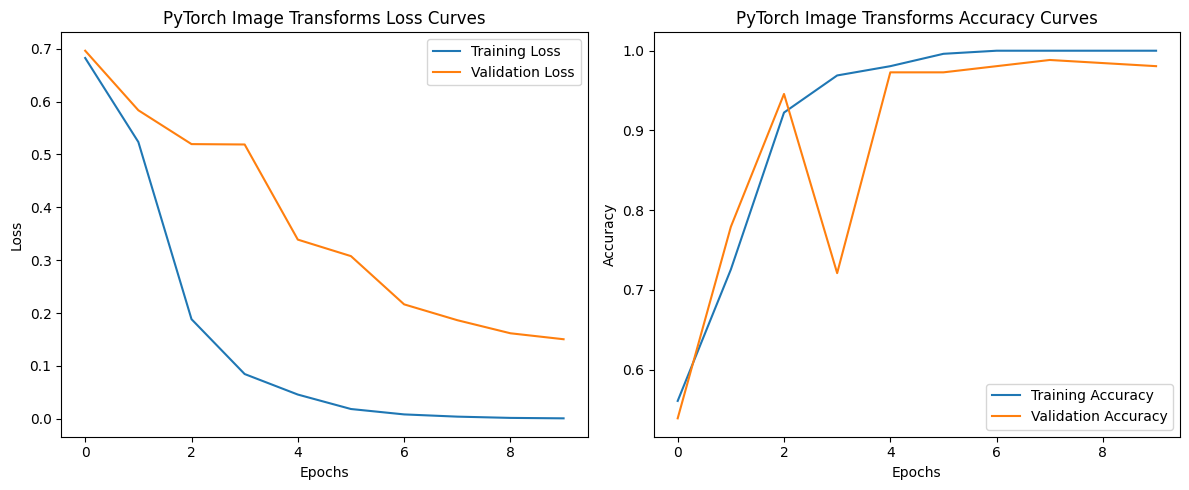

In [ ]:
model_plots("PyTorch Image Transforms", pyTorch_imageTransforms_history)

## PART 3: Model Comparisons

##### Keras vs. PyTorch

BASELINE: Keras Reference vs. PyTorch Conversion

Loss Difference:
 0    0.028798
1    0.161393
2    0.308505
3    0.178017
4    0.100024
5    0.080792
6    0.047869
7    0.032418
8    0.022596
9    0.014189
Name: loss, dtype: float64
Max Loss Difference: 0.3085053475464092
Accuracy Difference:
 0    0.053346
1    0.268671
2    0.168768
3    0.082444
4    0.035887
5    0.031038
6    0.016489
7    0.014549
8    0.005820
9    0.004850
Name: accuracy, dtype: float64
Max Accuracy Difference: 0.2686711788524365


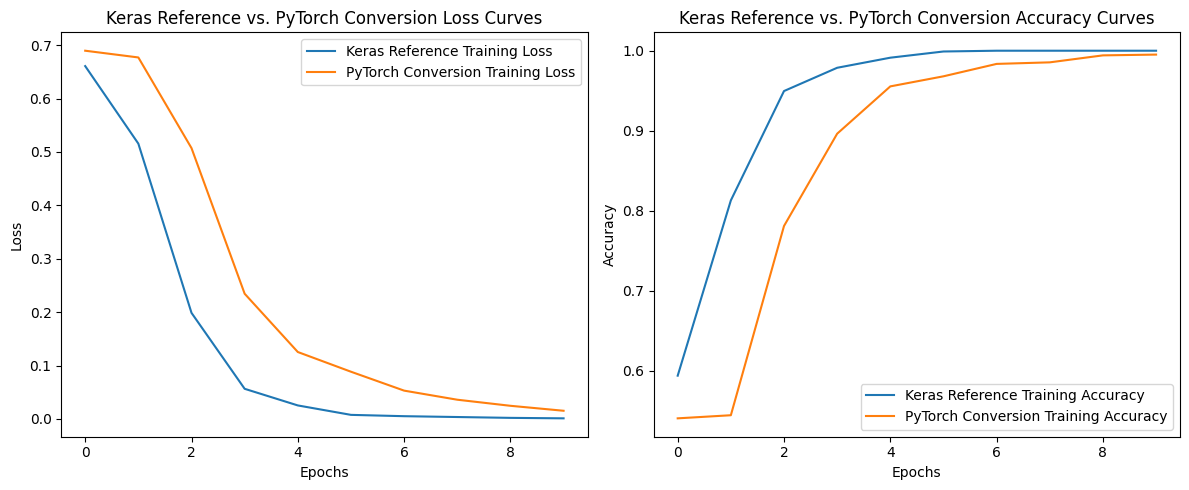

Loss Difference:
 0    0.095322
1    0.325766
2    0.217537
3    0.075155
4    0.055277
5    0.018999
6    0.016449
7    0.016421
8    0.019464
9    0.016619
Name: val_loss, dtype: float64
Max Loss Difference: 0.32576608061790474
Accuracy Difference:
 0    1.860465e-01
1    2.713178e-01
2    9.689921e-02
3    3.488372e-02
4    2.713178e-02
5    5.544618e-09
6    7.751934e-03
7    1.848206e-09
8    1.848206e-09
9    1.162791e-02
Name: val_accuracy, dtype: float64
Max Accuracy Difference: 0.27131783916044605


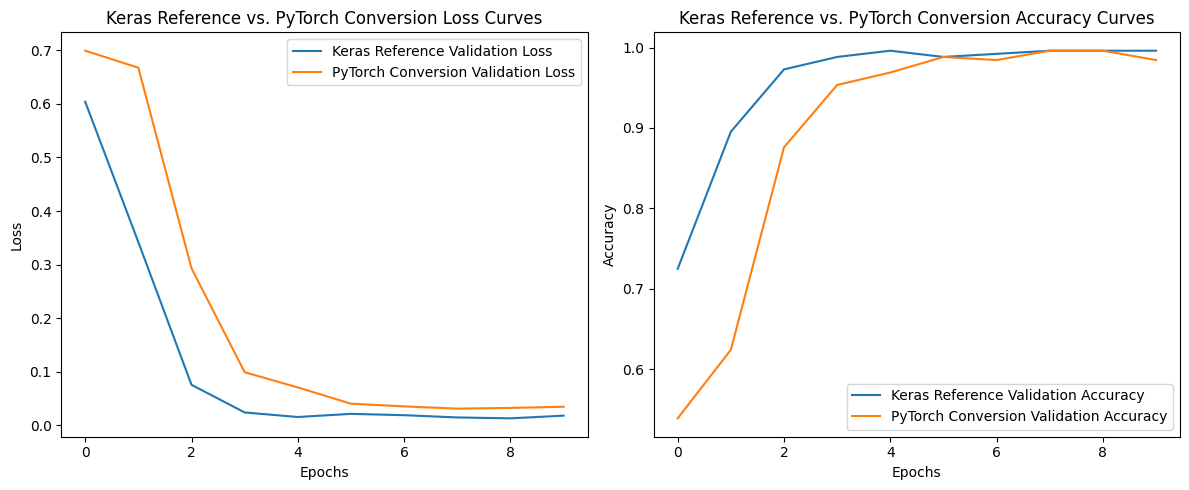

In [ ]:
full_model_comparison("Keras Reference", model_reference_history, "PyTorch Conversion", pytorch_conversion_history)

10x Learning Rate

Loss Difference:
 0    0.012974
1    0.014800
2    0.260096
3    0.126646
4    0.068482
5    0.006056
6    0.015002
7    0.005549
8    0.013958
9    0.009988
Name: loss, dtype: float64
Max Loss Difference: 0.26009562962195454
Accuracy Difference:
 0    0.014549
1    0.076625
2    0.209505
3    0.057226
4    0.032978
5    0.003880
6    0.006790
7    0.000970
8    0.004850
9    0.002910
Name: accuracy, dtype: float64
Max Accuracy Difference: 0.20950532971251723


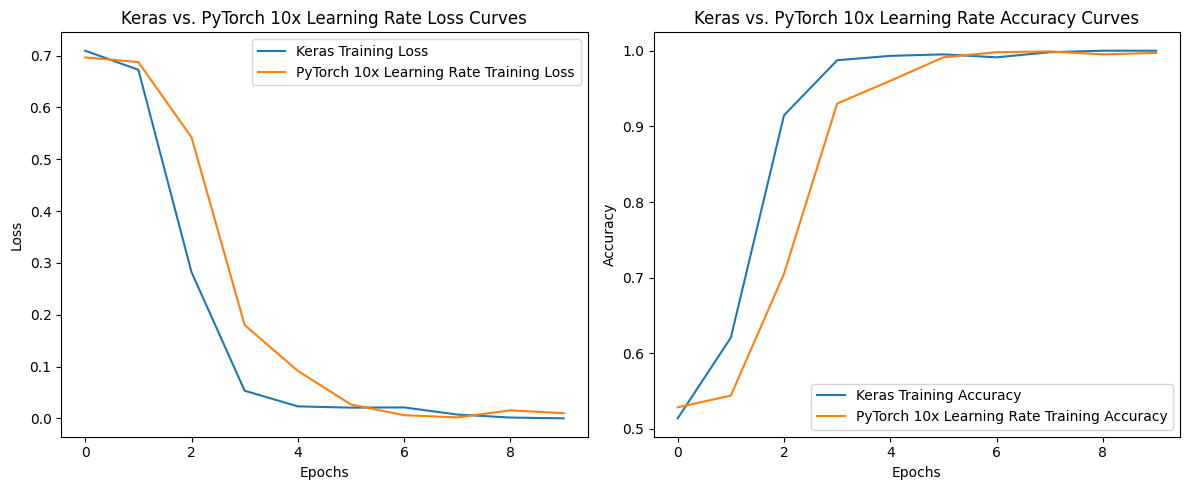

Loss Difference:
 0    0.018009
1    0.122081
2    0.214857
3    0.081972
4    0.039028
5    0.013429
6    0.004844
7    0.004291
8    0.047590
9    0.033664
Name: val_loss, dtype: float64
Max Loss Difference: 0.2148571267724037
Accuracy Difference:
 0    1.848206e-08
1    5.426355e-02
2    1.046511e-01
3    6.201550e-02
4    3.875982e-03
5    3.875965e-03
6    3.875975e-03
7    3.875960e-03
8    1.162791e-02
9    3.875976e-03
Name: val_accuracy, dtype: float64
Max Accuracy Difference: 0.1046511498532553


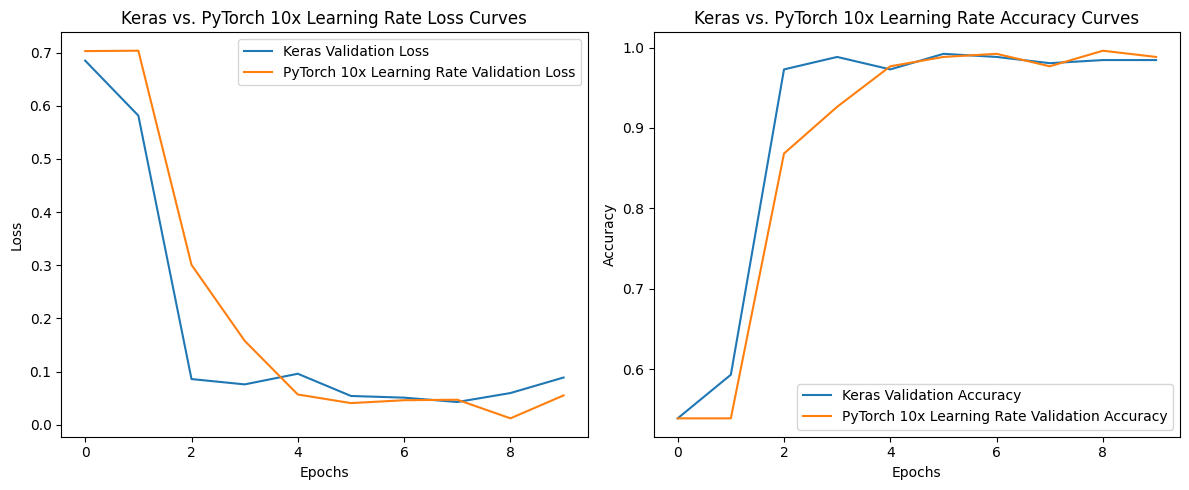

In [ ]:
full_model_comparison("Keras", keras_10x_LR_history, "PyTorch 10x Learning Rate", pyTorch_10x_LR_history)

100x Learning Rate

Loss Difference:
 0    16.426616
1     4.340198
2     0.059031
3     0.000269
4     0.012857
5     0.098335
6     0.005958
7     0.000320
8     0.001766
9     0.002540
Name: loss, dtype: float64
Max Loss Difference: 16.4266162795179
Accuracy Difference:
 0    5.819579e-03
1    1.939877e-03
2    2.230844e-02
3    1.939862e-02
4    4.073718e-02
5    9.699321e-03
6    2.521822e-02
7    2.387655e-08
8    2.387655e-08
9    2.387655e-08
Name: accuracy, dtype: float64
Max Accuracy Difference: 0.04073717597615478


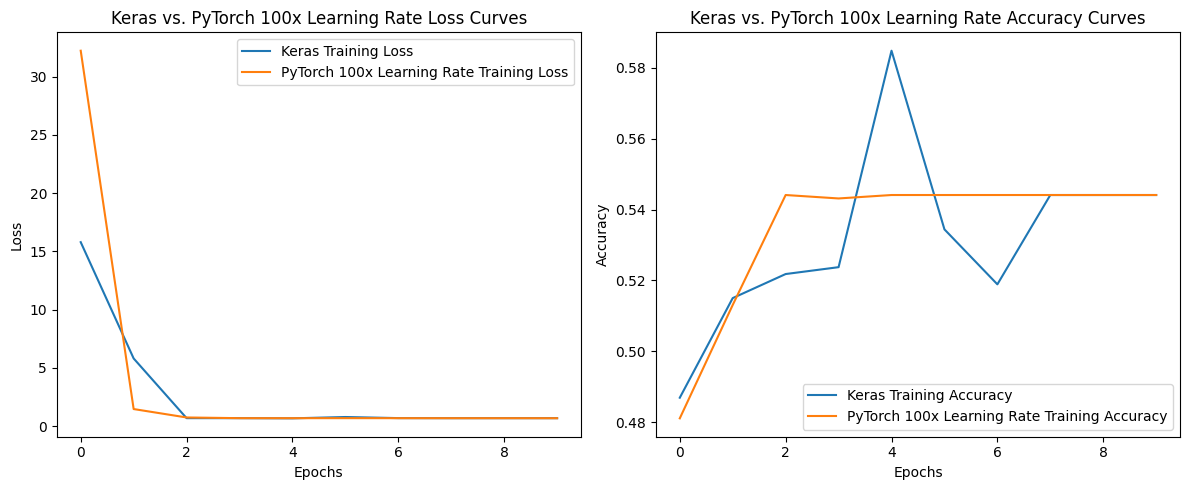

Loss Difference:
 0    0.001525
1    0.015105
2    0.032088
3    0.006156
4    0.548849
5    0.018881
6    0.010796
7    0.016314
8    0.018441
9    0.019983
Name: val_loss, dtype: float64
Max Loss Difference: 0.5488487601280212
Accuracy Difference:
 0    8.527134e-02
1    1.848206e-08
2    1.848206e-08
3    1.848206e-08
4    9.302325e-02
5    1.848206e-08
6    1.848206e-08
7    1.848206e-08
8    1.848206e-08
9    1.848206e-08
Name: val_accuracy, dtype: float64
Max Accuracy Difference: 0.09302325188651567


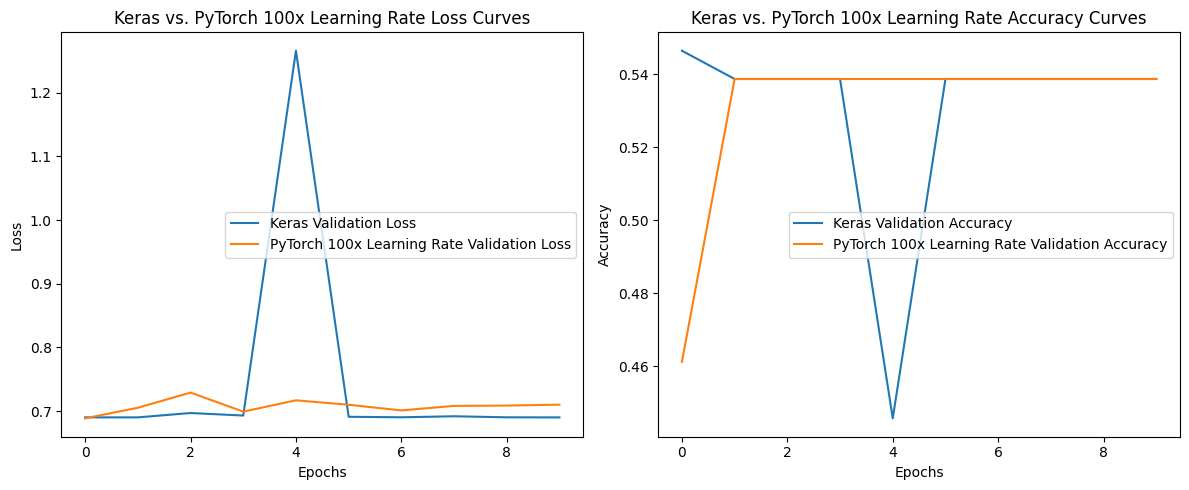

In [ ]:
full_model_comparison("Keras", keras_100x_LR_history, "PyTorch 100x Learning Rate", pyTorch_100x_LR_history)

Additional Layers

Loss Difference:
 0    0.017594
1    0.145442
2    0.406440
3    0.227088
4    0.041552
5    0.005553
6    0.003222
7    0.000146
8    0.001699
9    0.000359
Name: loss, dtype: float64
Max Loss Difference: 0.4064400844714221
Accuracy Difference:
 0    0.038797
1    0.220175
2    0.295829
3    0.092144
4    0.009699
5    0.004850
6    0.001940
7    0.000000
8    0.000000
9    0.000000
Name: accuracy, dtype: float64
Max Accuracy Difference: 0.295829274605826


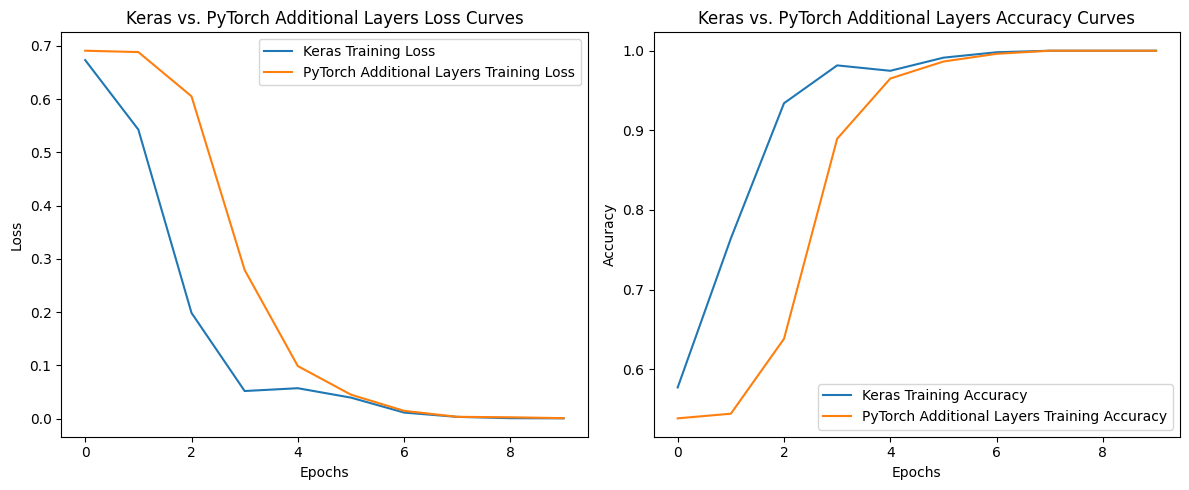

Loss Difference:
 0    0.072051
1    0.349527
2    0.305024
3    0.007230
4    0.005826
5    0.015813
6    0.012764
7    0.010180
8    0.018139
9    0.014258
Name: val_loss, dtype: float64
Max Loss Difference: 0.34952682256698614
Accuracy Difference:
 0    1.356589e-01
1    3.565892e-01
2    1.472868e-01
3    3.875984e-03
4    7.751945e-03
5    1.848206e-09
6    3.875973e-03
7    1.848206e-09
8    7.751942e-03
9    1.848206e-09
Name: val_accuracy, dtype: float64
Max Accuracy Difference: 0.35658915698990346


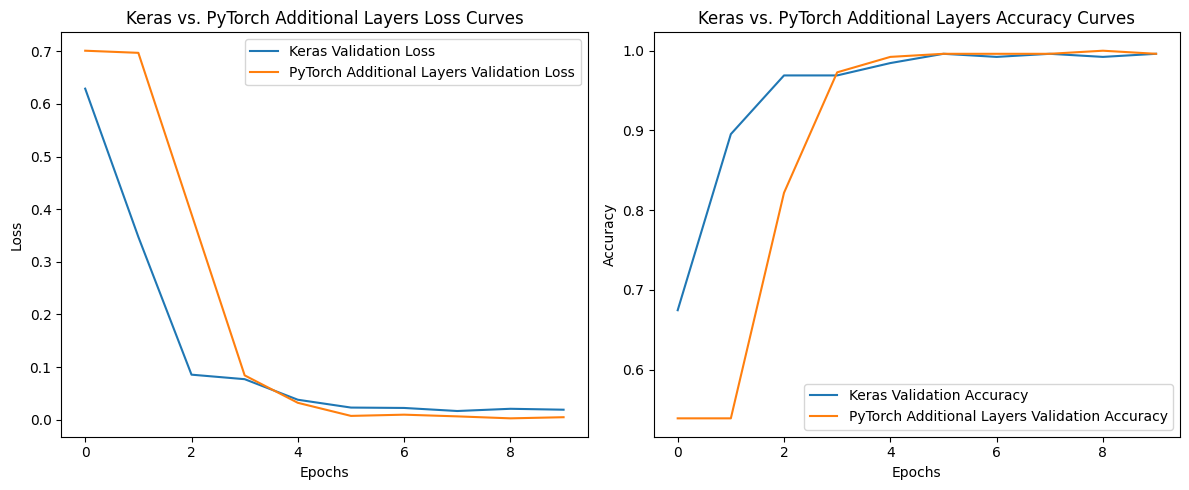

In [ ]:
full_model_comparison("Keras", keras_additional_conv_history, "PyTorch Additional Layers", pyTorch_additional_conv_history)

Image Transforms

Loss Difference:
 0    0.003179
1    0.138516
2    0.378494
3    0.278342
4    0.112831
5    0.047163
6    0.031323
7    0.019478
8    0.043265
9    0.022852
Name: loss, dtype: float64
Max Loss Difference: 0.37849359119804027
Accuracy Difference:
 0    0.006790
1    0.142580
2    0.213385
3    0.110572
4    0.031038
5    0.018429
6    0.013579
7    0.005820
8    0.014549
9    0.008729
Name: accuracy, dtype: float64
Max Accuracy Difference: 0.21338505541434227


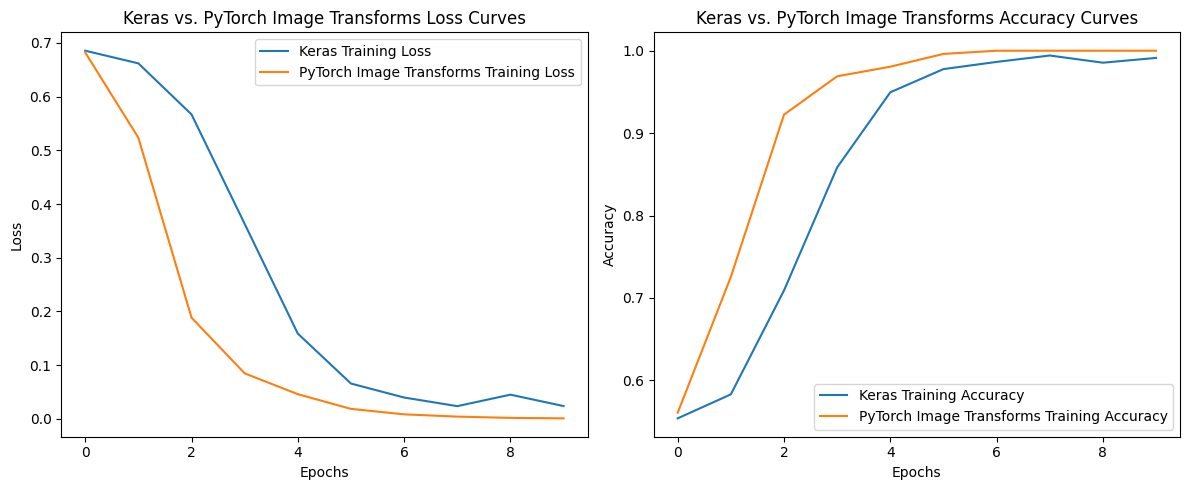

Loss Difference:
 0    0.015872
1    0.048661
2    0.024847
3    0.323467
4    0.281747
5    0.283329
6    0.197219
7    0.153050
8    0.143738
9    0.128765
Name: val_loss, dtype: float64
Max Loss Difference: 0.3234669625759125
Accuracy Difference:
 0    0.003876
1    0.127907
2    0.116279
3    0.236434
4    0.019380
5    0.023256
6    0.011628
7    0.003876
8    0.007752
9    0.011628
Name: val_accuracy, dtype: float64
Max Accuracy Difference: 0.2364340881968653


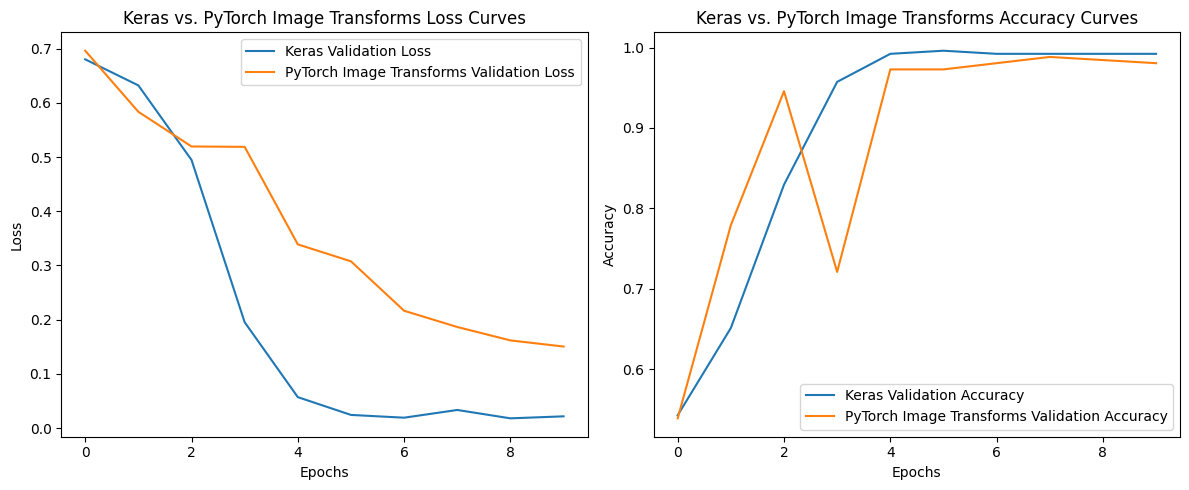

In [ ]:
full_model_comparison("Keras", keras_imageTransforms_history, "PyTorch Image Transforms", pyTorch_imageTransforms_history)

##### Optimizations vs. Baseline (Keras)

10x Learning Rate

Loss Difference:
 0    0.048692
1    0.157196
2    0.083684
3    0.002868
4    0.001970
5    0.013285
6    0.016168
7    0.004020
8    0.000242
9    0.000860
Name: loss, dtype: float64
Max Loss Difference: 0.15719610452651978
Accuracy Difference:
 0    0.079534
1    0.192047
2    0.034918
3    0.008729
4    0.001940
5    0.003880
6    0.008729
7    0.001940
8    0.000000
9    0.000000
Name: accuracy, dtype: float64
Max Accuracy Difference: 0.19204652309417725


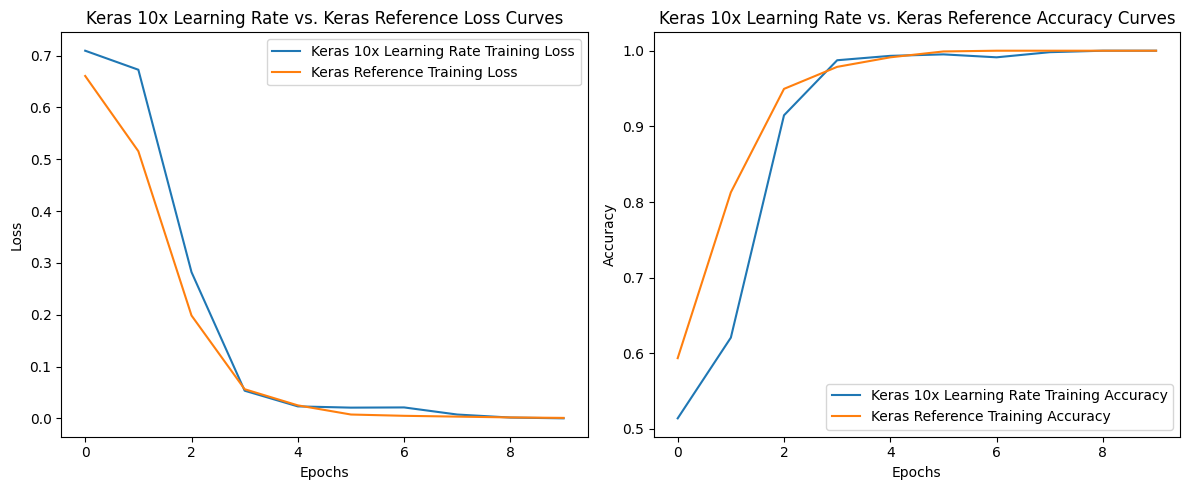

Loss Difference:
 0    0.080852
1    0.239638
2    0.010463
3    0.052106
4    0.080622
5    0.032939
6    0.032258
7    0.028270
8    0.046809
9    0.071002
Name: val_loss, dtype: float64
Max Loss Difference: 0.23963752388954168
Accuracy Difference:
 0    0.186046
1    0.302326
2    0.000000
3    0.000000
4    0.023256
5    0.003876
6    0.003876
7    0.015504
8    0.011628
9    0.011628
Name: val_accuracy, dtype: float64
Max Accuracy Difference: 0.30232560634613037


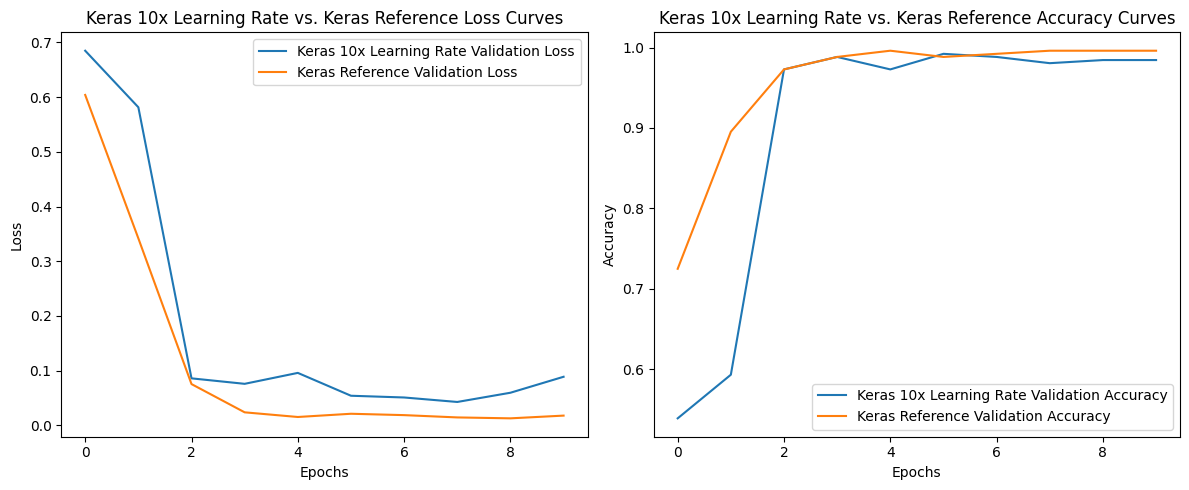

In [ ]:
full_model_comparison("Keras 10x Learning Rate", keras_10x_LR_history, "Keras Reference", model_reference_history)

100x Learning Rate

Loss Difference:
 0    15.131155
1     5.298213
2     0.493678
3     0.634521
4     0.651251
5     0.783047
6     0.691260
7     0.685982
8     0.688967
9     0.689149
Name: loss, dtype: float64
Max Loss Difference: 15.131155133247375
Accuracy Difference:
 0    0.106693
1    0.297769
2    0.427740
3    0.454898
4    0.406402
5    0.464597
6    0.481086
7    0.455868
8    0.455868
9    0.455868
Name: accuracy, dtype: float64
Max Accuracy Difference: 0.4810863137245178


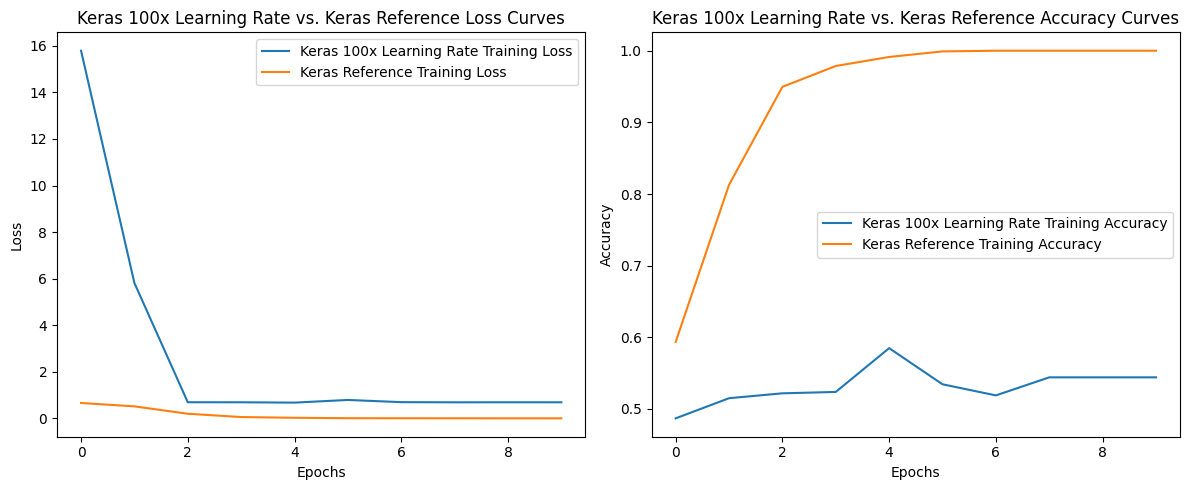

Loss Difference:
 0    0.086124
1    0.348308
2    0.621541
3    0.669229
4    1.250486
5    0.669909
6    0.671597
7    0.677400
8    0.677440
9    0.672287
Name: val_loss, dtype: float64
Max Loss Difference: 1.2504864251241088
Accuracy Difference:
 0    0.178295
1    0.356589
2    0.434108
3    0.449612
4    0.550388
5    0.449612
6    0.453488
7    0.457364
8    0.457364
9    0.457364
Name: val_accuracy, dtype: float64
Max Accuracy Difference: 0.5503875911235812


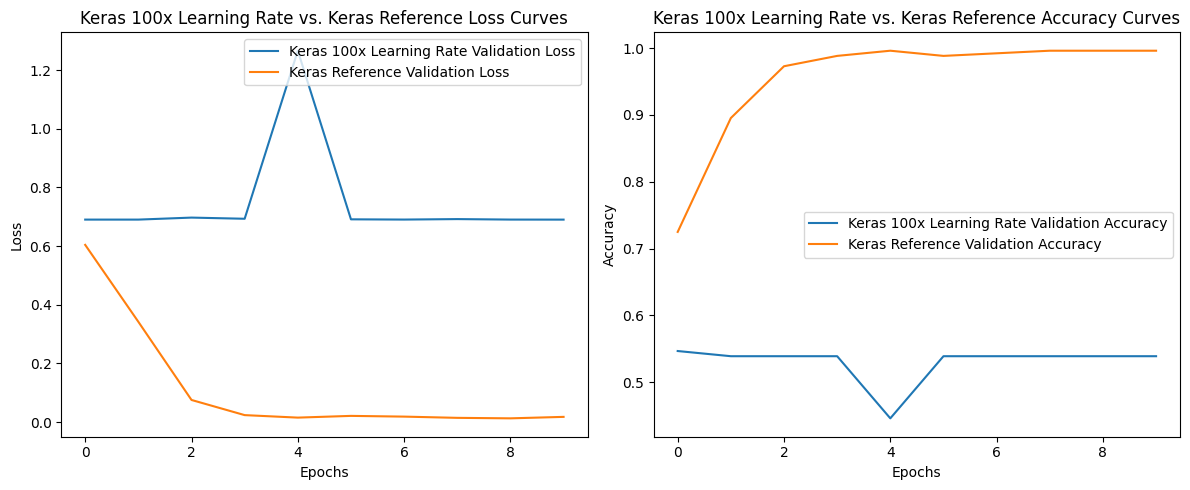

In [ ]:
full_model_comparison("Keras 100x Learning Rate", keras_100x_LR_history, "Keras Reference", model_reference_history)

Additional Layers

Loss Difference:
 0    0.012338
1    0.027129
2    0.000073
3    0.004336
4    0.032057
5    0.032072
6    0.006499
7    0.000015
8    0.000906
9    0.000291
Name: loss, dtype: float64
Max Loss Difference: 0.0320717389695347
Accuracy Difference:
 0    0.016489
1    0.048497
2    0.015519
3    0.002910
4    0.016489
5    0.007759
6    0.001940
7    0.000000
8    0.000000
9    0.000000
Name: accuracy, dtype: float64
Max Accuracy Difference: 0.04849660396575928


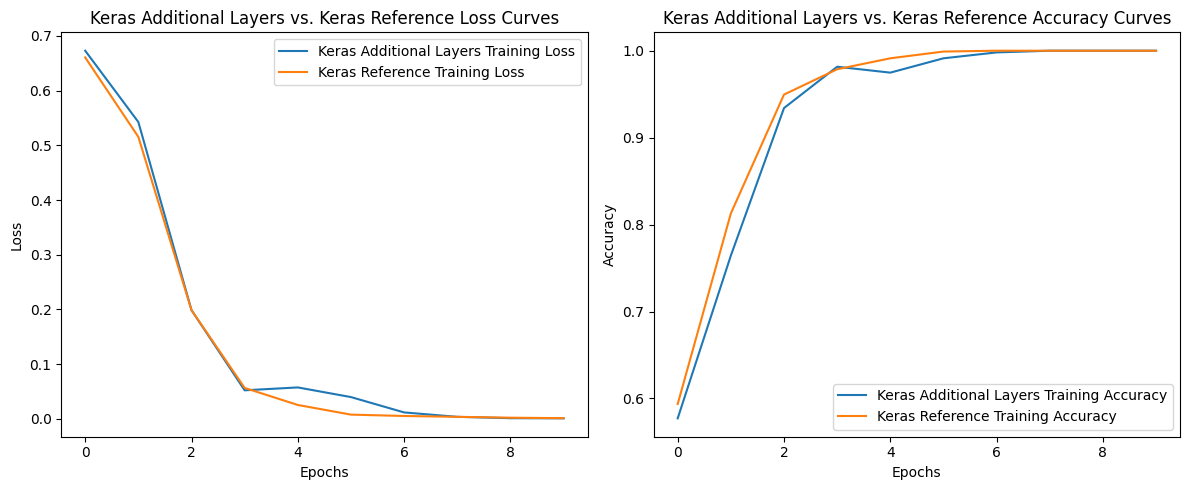

Loss Difference:
 0    0.024773
1    0.005444
2    0.010240
3    0.053306
4    0.022799
5    0.002014
6    0.003790
7    0.002182
8    0.008076
9    0.001339
Name: val_loss, dtype: float64
Max Loss Difference: 0.0533062256872654
Accuracy Difference:
 0    0.050388
1    0.000000
2    0.003876
3    0.019380
4    0.011628
5    0.007752
6    0.000000
7    0.000000
8    0.003876
9    0.000000
Name: val_accuracy, dtype: float64
Max Accuracy Difference: 0.050387561321258545


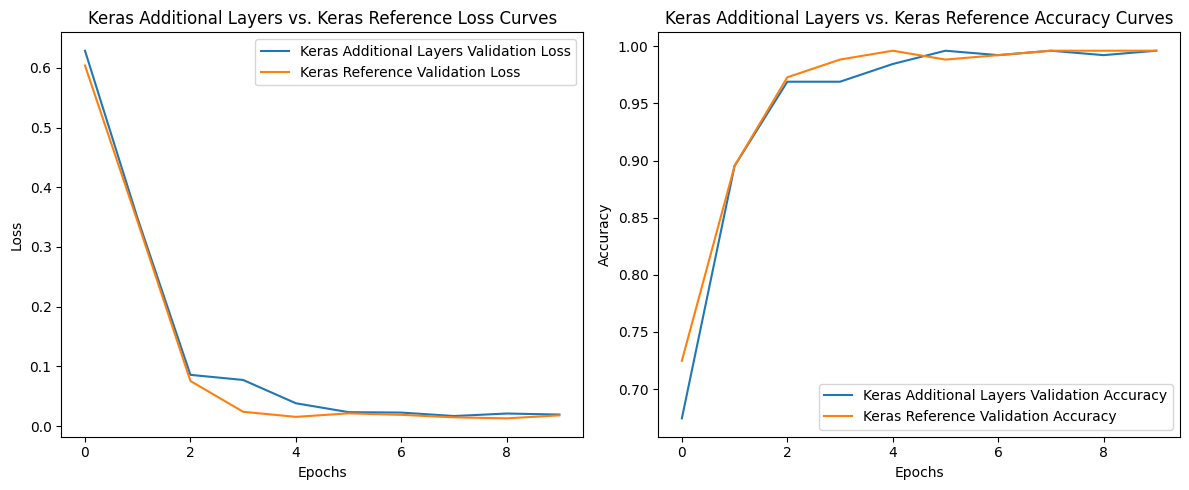

In [ ]:
full_model_comparison("Keras Additional Layers", keras_additional_conv_history, "Keras Reference", model_reference_history)

Image Transforms

Loss Difference:
 0    0.024801
1    0.146480
2    0.368279
3    0.306578
4    0.133398
5    0.058046
6    0.034493
7    0.019996
8    0.042968
9    0.022611
Name: loss, dtype: float64
Max Loss Difference: 0.3682792931795121
Accuracy Difference:
 0    0.039767
1    0.229874
2    0.240543
3    0.120272
4    0.041707
5    0.021338
6    0.013579
7    0.005820
8    0.014549
9    0.008729
Name: accuracy, dtype: float64
Max Accuracy Difference: 0.2405431270599364


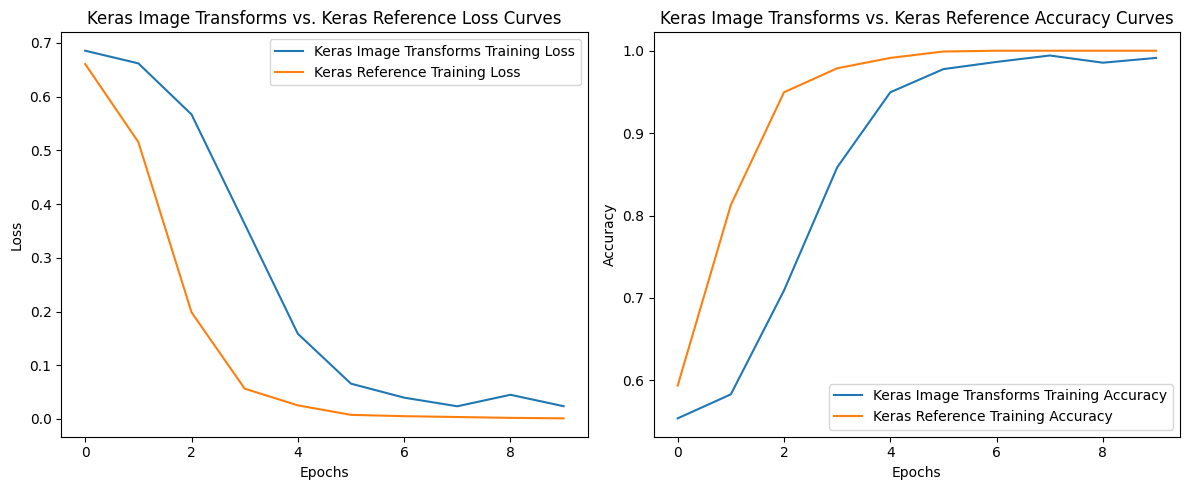

Loss Difference:
 0    0.076147
1    0.290226
2    0.419159
3    0.171457
4    0.041804
5    0.003087
6    0.000488
7    0.018927
8    0.005159
9    0.003859
Name: val_loss, dtype: float64
Max Loss Difference: 0.419158659875393
Accuracy Difference:
 0    0.182171
1    0.244186
2    0.143411
3    0.031008
4    0.003876
5    0.007752
6    0.000000
7    0.003876
8    0.003876
9    0.003876
Name: val_accuracy, dtype: float64
Max Accuracy Difference: 0.24418604373931885


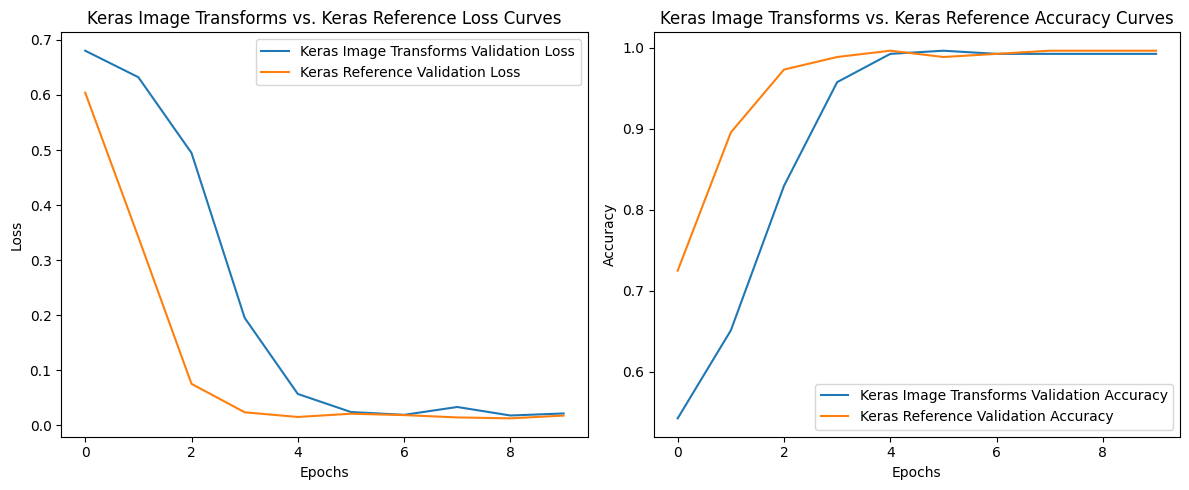

In [ ]:
full_model_comparison("Keras Image Transforms", keras_imageTransforms_history, "Keras Reference", model_reference_history)

##### Optimizations vs. Baseline (PyTorch)

10x Learning Rate

Loss Difference:
 0    0.006921
1    0.010603
2    0.035274
3    0.054238
4    0.033512
5    0.061451
6    0.046703
7    0.033947
8    0.008880
9    0.005061
Name: loss, dtype: float64
Max Loss Difference: 0.061450552667819805
Accuracy Difference:
 0    0.011639
1    0.000000
2    0.075655
3    0.033948
4    0.004850
5    0.023278
6    0.014549
7    0.013579
8    0.000970
9    0.001940
Name: accuracy, dtype: float64
Max Accuracy Difference: 0.07565470417070796


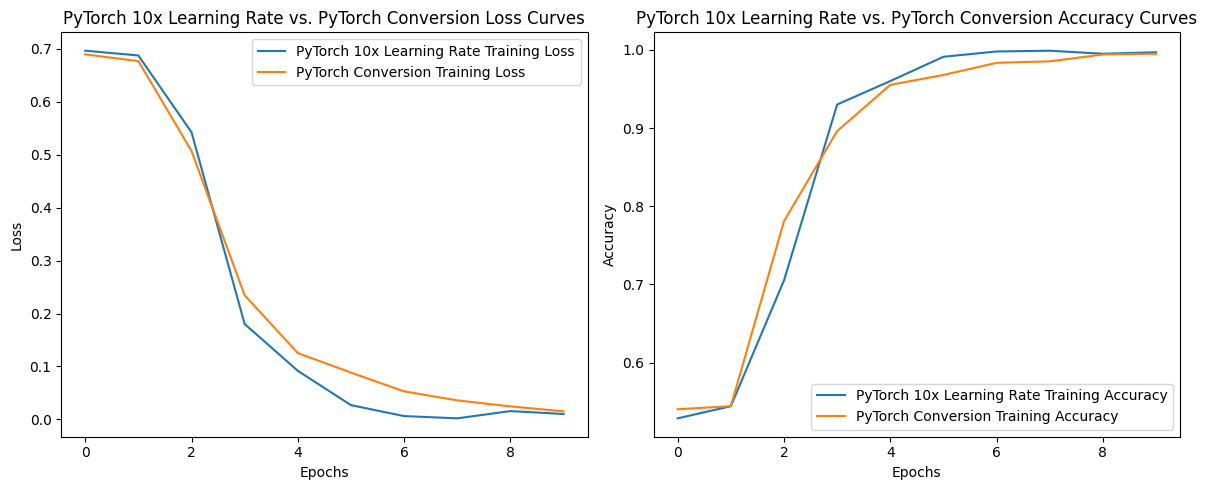

Loss Difference:
 0    0.003539
1    0.035952
2    0.007782
3    0.058923
4    0.013684
5    0.000510
6    0.010965
7    0.016140
8    0.020245
9    0.020719
Name: val_loss, dtype: float64
Max Loss Difference: 0.05892329737544061
Accuracy Difference:
 0    0.000000
1    0.085271
2    0.007752
3    0.027132
4    0.007752
5    0.000000
6    0.007752
7    0.019380
8    0.000000
9    0.003876
Name: val_accuracy, dtype: float64
Max Accuracy Difference: 0.0852713178294574


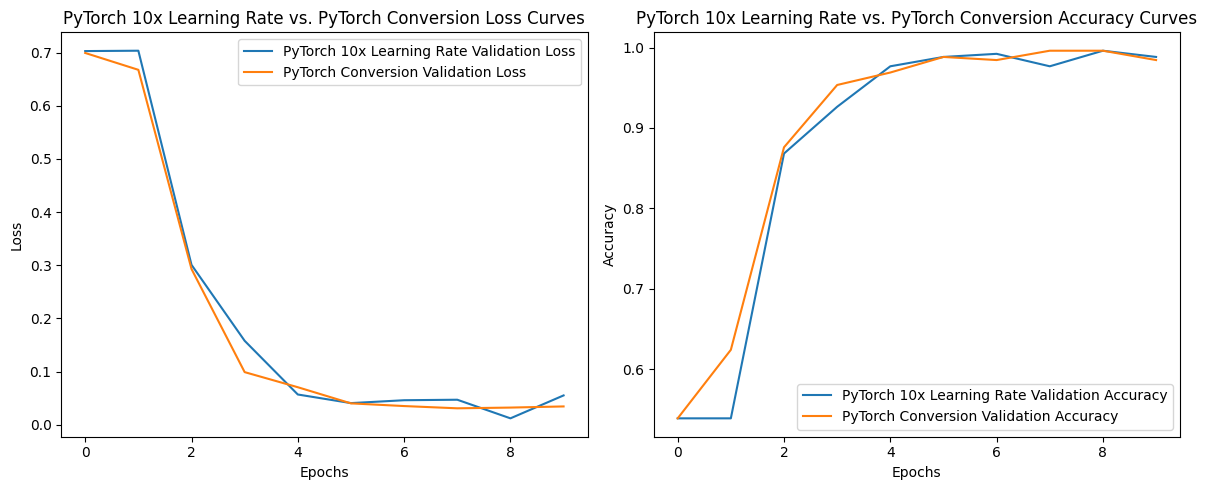

In [ ]:
full_model_comparison("PyTorch 10x Learning Rate", pyTorch_10x_LR_history, "PyTorch Conversion", pytorch_conversion_history)

100x Learning Rate

Loss Difference:
 0    31.528974
1     0.796622
2     0.244203
3     0.456773
4     0.564084
5     0.603920
6     0.637433
7     0.653244
8     0.664605
9     0.672420
Name: loss, dtype: float64
Max Loss Difference: 31.528973761726828
Accuracy Difference:
 0    0.059166
1    0.031038
2    0.236663
3    0.353055
4    0.411251
5    0.423860
6    0.439379
7    0.441319
8    0.450048
9    0.451018
Name: accuracy, dtype: float64
Max Accuracy Difference: 0.4510184287099904


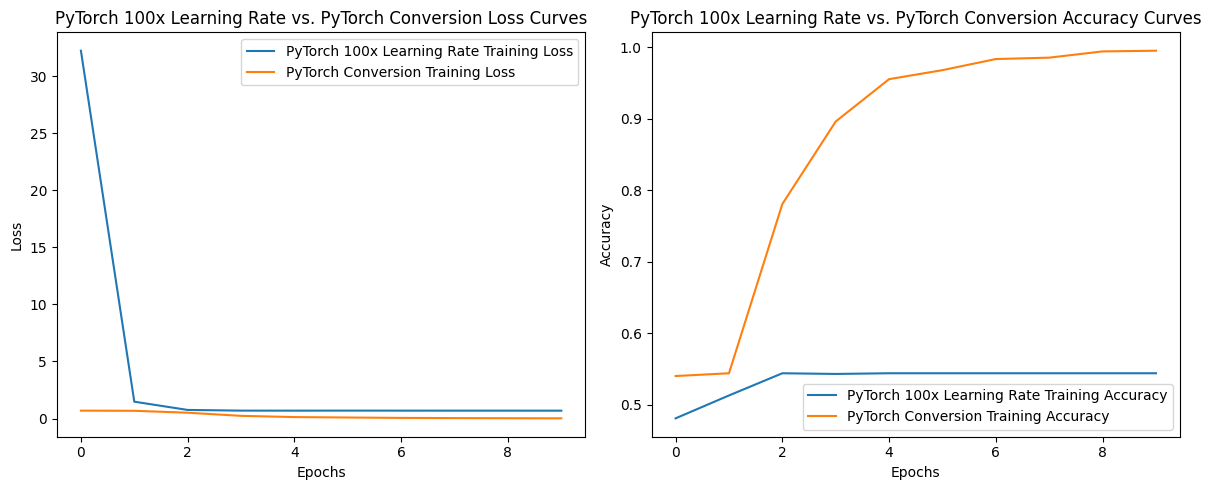

Loss Difference:
 0    0.010723
1    0.037647
2    0.436092
3    0.600230
4    0.646360
5    0.669792
6    0.665945
7    0.677293
8    0.676418
9    0.675650
Name: val_loss, dtype: float64
Max Loss Difference: 0.6772927777841687
Accuracy Difference:
 0    0.077519
1    0.085271
2    0.337209
3    0.414729
4    0.430233
5    0.449612
6    0.445736
7    0.457364
8    0.457364
9    0.445736
Name: val_accuracy, dtype: float64
Max Accuracy Difference: 0.45736434108527146


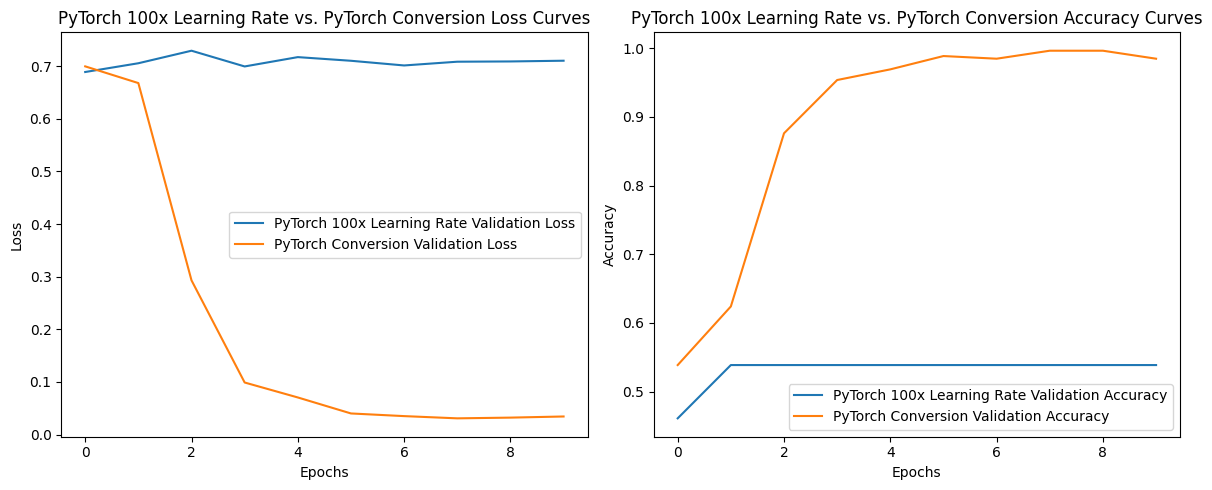

In [ ]:
full_model_comparison("PyTorch 100x Learning Rate", pyTorch_100x_LR_history, "PyTorch Conversion", pytorch_conversion_history)

Additional Layers

Loss Difference:
 0    0.001133
1    0.011178
2    0.098007
3    0.044735
4    0.026415
5    0.043167
6    0.038148
7    0.032287
8    0.021802
9    0.014121
Name: loss, dtype: float64
Max Loss Difference: 0.09800743969047776
Accuracy Difference:
 0    0.001940
1    0.000000
2    0.142580
3    0.006790
4    0.009699
5    0.018429
6    0.012609
7    0.014549
8    0.005820
9    0.004850
Name: accuracy, dtype: float64
Max Accuracy Difference: 0.14258001939864207


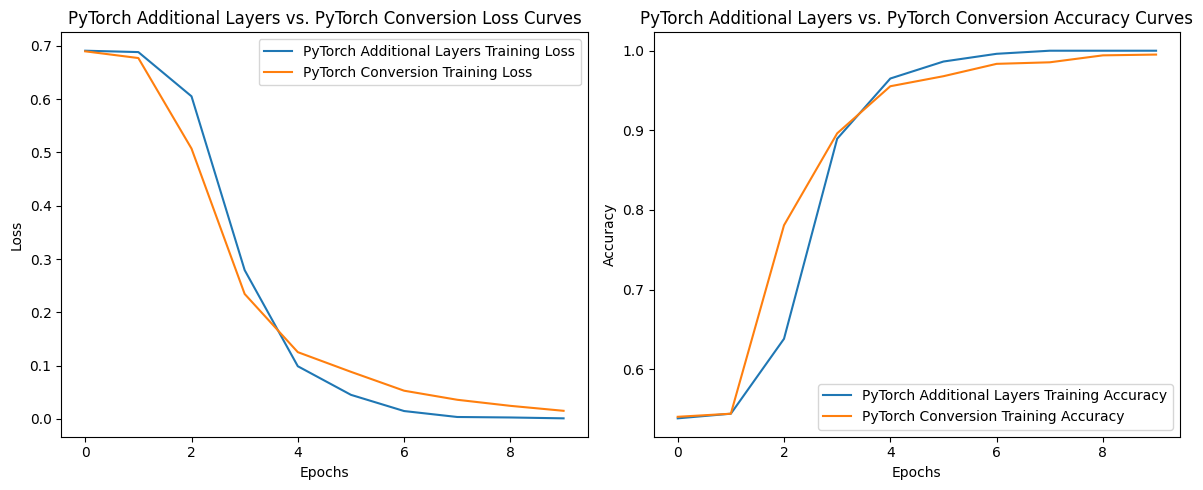

Loss Difference:
 0    0.001501
1    0.029205
2    0.097726
3    0.014619
4    0.038305
5    0.032798
6    0.025423
7    0.024419
8    0.029526
9    0.029539
Name: val_loss, dtype: float64
Max Loss Difference: 0.0977263033390045
Accuracy Difference:
 0    0.000000
1    0.085271
2    0.054264
3    0.019380
4    0.023256
5    0.007752
6    0.011628
7    0.000000
8    0.003876
9    0.011628
Name: val_accuracy, dtype: float64
Max Accuracy Difference: 0.0852713178294574


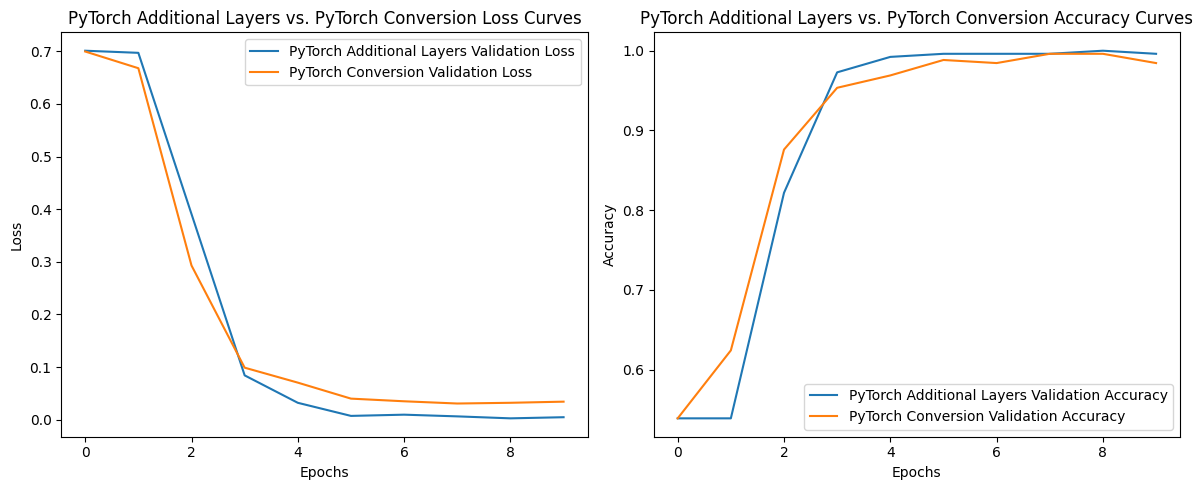

In [ ]:
full_model_comparison("PyTorch Additional Layers", pyTorch_additional_conv_history, "PyTorch Conversion", pytorch_conversion_history)

Image Transforms

Loss Difference:
 0    0.007175
1    0.153429
2    0.318720
3    0.149781
4    0.079457
5    0.069909
6    0.044698
7    0.031900
8    0.022893
9    0.014431
Name: loss, dtype: float64
Max Loss Difference: 0.31871964556493737
Accuracy Difference:
 0    0.020369
1    0.181377
2    0.141610
3    0.072745
4    0.025218
5    0.028128
6    0.016489
7    0.014549
8    0.005820
9    0.004850
Name: accuracy, dtype: float64
Max Accuracy Difference: 0.18137730358874882


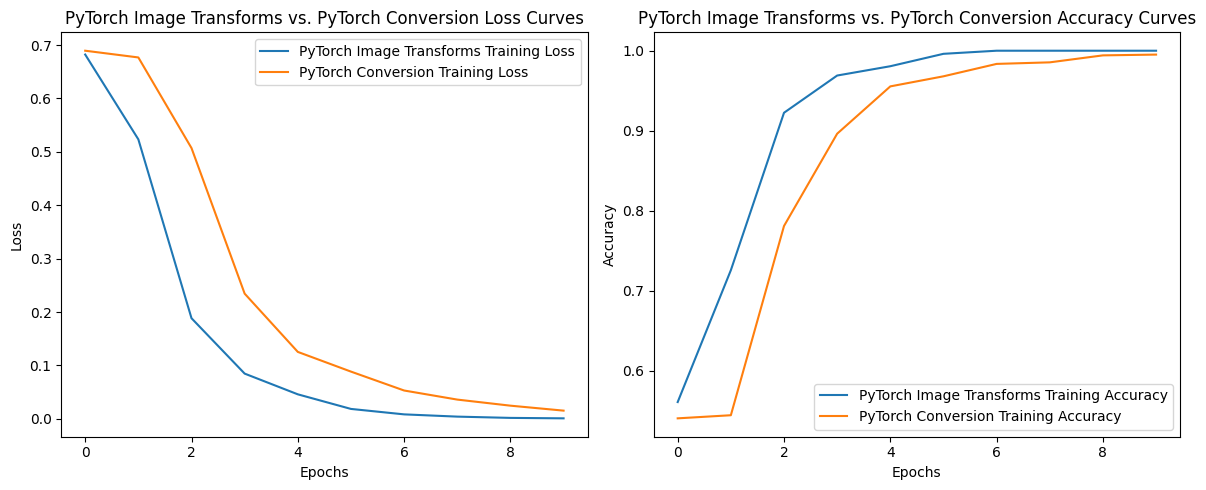

Loss Difference:
 0    0.003304
1    0.084202
2    0.226468
3    0.419769
4    0.268274
5    0.267417
6    0.181258
7    0.155556
8    0.129433
9    0.116005
Name: val_loss, dtype: float64
Max Loss Difference: 0.4197687990963459
Accuracy Difference:
 0    0.000000
1    0.155039
2    0.069767
3    0.232558
4    0.003876
5    0.015504
6    0.003876
7    0.007752
8    0.011628
9    0.003876
Name: val_accuracy, dtype: float64
Max Accuracy Difference: 0.2325581395348837


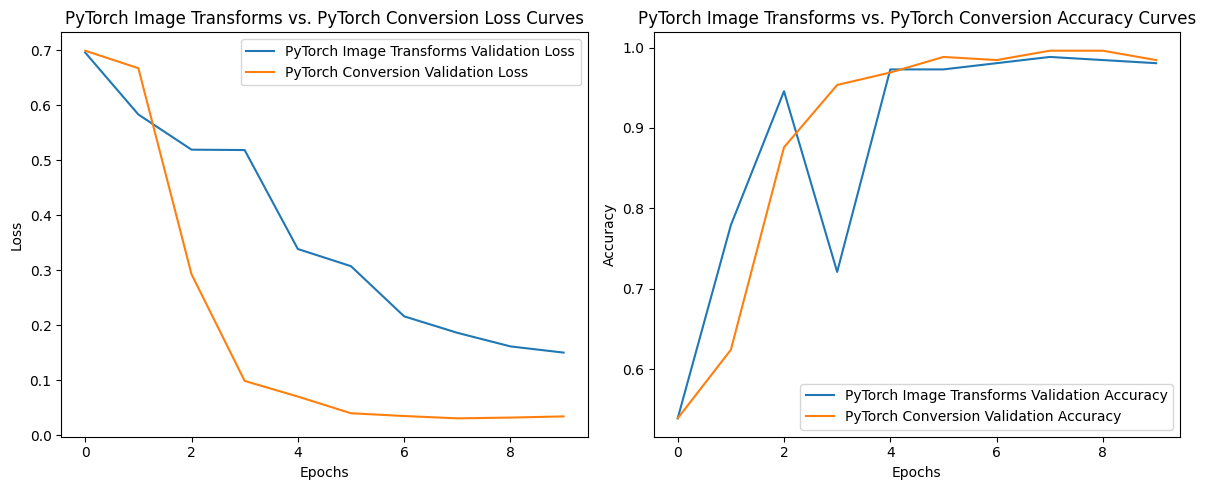

In [ ]:
full_model_comparison("PyTorch Image Transforms", pyTorch_imageTransforms_history, "PyTorch Conversion", pytorch_conversion_history)